In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system
import re
import pandas as pd
from sklearn.utils import shuffle
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/B00K8K937I_Puritan'sPrideSuperStrengthRapidReleaseCapsules Melatonin.csv")

df2 = pd.read_csv("/content/B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv")
df3 = pd.read_csv("/content/B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv")
df4 = pd.read_csv("/content/B07GR9WBFY_CarlyleMelatonin12mgFastDissolve180Tablets.csv")
df6 = pd.read_csv("/content/B079TD7HG2_NatrolMelatoninSleepAidGummy.csv")
df7 = pd.read_csv("/content/B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements.csv")
df8 = pd.read_csv("/content/B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies.csv")

# reading the csv files into dataframes

In [4]:
df = pd.concat([df,df2,df3,df4,df6,df7,df8],ignore_index=True, axis=0)  #combing all dataframes into a single dataframe

In [5]:
df.head()

asin                                      product_title  \
0  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   

   average_rating  total_reviews    review_author author_badge  \
0             4.6           3273        Thomas B.          NaN   
1             4.6           3273     Andie Allday          NaN   
2             4.6           3273  douglas w smith          NaN   
3             4.6           3273  Amazon Customer          NaN   
4             4.6           3273   Leslie Masters          NaN   

               badge   reviewed_product_attribute reviewed_variant_asin  \
0  Verified Purchase  Size: 120 Count (Pack of 2)            B00K8K937I   
1  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   
2  Verified Purchase  Size: 120 Count (Pack of 2)            B00K8K937I   
3  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   
4  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   

                                  variant_review_url  ...  reviewed_country  \
0  https://www.amazon.com/Puritans-Pride-Strength...  ...    United States    
1  https://www.amazon.com/Puritans-Pride-Strength...  ...     United States   
2  https://www.amazon.com/Puritans-Pride-Strength...  ...    United States    
3  https://www.amazon.com/Puritans-Pride-Strength...  ...     United States   
4  https://www.amazon.com/Puritans-Pride-Strength...  ...     United States   

                                         review_text review_comment_count  \
0  These works great, I think the gel capsule dis...                  NaN   
1                Powerful! Will knock you right out!                  NaN   
2  Best melatonin I've tried,so much better then ...                  NaN   
3                   Works like a charm, great price.                  NaN   
4  I love this product, I use it to sleep at nigh...                  NaN   

                                       review_header  \
0  Max dose and it hits faster than other quick r...   
1                                          Powerful!   
2                                            Amazing   
3                                         Five Stars   
4   This is one great product, people should try it.   

   no_of_people_reacted_helpful  \
0                           NaN   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   

                                  author_profile_url  \
0  https://www.amazon.com/gp/profile/amzn1.accoun...   
1  https://www.amazon.com/gp/profile/amzn1.accoun...   
2  https://www.amazon.com/gp/profile/amzn1.accoun...   
3  https://www.amazon.com/gp/profile/amzn1.accoun...   
4  https://www.amazon.com/gp/profile/amzn1.accoun...   

                                                 url            brand  \
0  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
1  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
2  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
3  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
4  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   

                                          review_url       input  
0  https://www.amazon.com/gp/customer-reviews/R34...  B00K8K937I  
1  https://www.amazon.com/gp/customer-reviews/R1R...  B00K8K937I  
2  https://www.amazon.com/gp/customer-reviews/R1K...  B00K8K937I  
3  https://www.amazon.com/gp/customer-reviews/R4D...  B00K8K937I  
4  https://www.amazon.com/gp/customer-reviews/R2F...  B00K8K937I  

[5 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   asin                          15910 non-null  object 
 1   product_title                 15910 non-null  object 
 2   average_rating                15910 non-null  float64
 3   total_reviews                 15910 non-null  int64  
 4   review_author                 15910 non-null  object 
 5   author_badge                  102 non-null    object 
 6   badge                         15601 non-null  object 
 7   reviewed_product_attribute    13815 non-null  object 
 8   reviewed_variant_asin         13815 non-null  object 
 9   variant_review_url            13815 non-null  object 
 10  review_rating                 15910 non-null  int64  
 11  review_date                   15910 non-null  object 
 12  reviewed_country              15910 non-null  object 
 13  r

In [7]:
df.shape

(15910, 22)

In [8]:
df['product_title'] = df['product_title'].astype(str)  # Ensure the column is treated as a string

# Extract numerical values from the 'product_title' column with a more flexible pattern
mg_values = df['product_title'].str.extract(r'(\d+(\.\d+)?)\s*mg', expand=False)

# Create a new column 'dose' in the DataFrame
df['dose'] = pd.to_numeric(mg_values[0], errors='coerce')

df[['size', 'pack_count']] = df['reviewed_product_attribute'].str.extract(r'(\d+) Count \(Pack of (\d+)\)')

# Convert the extracted columns to numeric
df['size'] = pd.to_numeric(df['size'])
df['pack_count'] = pd.to_numeric(df['pack_count'])

df['review_date'] = pd.to_datetime(df['review_date'], format='%d-%b-%y')

# Extract month and year into separate columns
df['month'] = df['review_date'].dt.month
df['year'] = df['review_date'].dt.year

df.head()


asin                                      product_title  \
0  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
1  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
2  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
3  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   
4  B00K8K937I  Puritan's Pride Super Strength Rapid Release C...   

   average_rating  total_reviews    review_author author_badge  \
0             4.6           3273        Thomas B.          NaN   
1             4.6           3273     Andie Allday          NaN   
2             4.6           3273  douglas w smith          NaN   
3             4.6           3273  Amazon Customer          NaN   
4             4.6           3273   Leslie Masters          NaN   

               badge   reviewed_product_attribute reviewed_variant_asin  \
0  Verified Purchase  Size: 120 Count (Pack of 2)            B00K8K937I   
1  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   
2  Verified Purchase  Size: 120 Count (Pack of 2)            B00K8K937I   
3  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   
4  Verified Purchase  Size: 120 Count (Pack of 1)            B004R66PVG   

                                  variant_review_url  ...  \
0  https://www.amazon.com/Puritans-Pride-Strength...  ...   
1  https://www.amazon.com/Puritans-Pride-Strength...  ...   
2  https://www.amazon.com/Puritans-Pride-Strength...  ...   
3  https://www.amazon.com/Puritans-Pride-Strength...  ...   
4  https://www.amazon.com/Puritans-Pride-Strength...  ...   

                                  author_profile_url  \
0  https://www.amazon.com/gp/profile/amzn1.accoun...   
1  https://www.amazon.com/gp/profile/amzn1.accoun...   
2  https://www.amazon.com/gp/profile/amzn1.accoun...   
3  https://www.amazon.com/gp/profile/amzn1.accoun...   
4  https://www.amazon.com/gp/profile/amzn1.accoun...   

                                                 url            brand  \
0  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
1  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
2  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
3  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   
4  https://www.amazon.com/product-reviews/B00K8K9...  Puritan's Pride   

                                          review_url       input dose   size  \
0  https://www.amazon.com/gp/customer-reviews/R34...  B00K8K937I  NaN  120.0   
1  https://www.amazon.com/gp/customer-reviews/R1R...  B00K8K937I  NaN  120.0   
2  https://www.amazon.com/gp/customer-reviews/R1K...  B00K8K937I  NaN  120.0   
3  https://www.amazon.com/gp/customer-reviews/R4D...  B00K8K937I  NaN  120.0   
4  https://www.amazon.com/gp/customer-reviews/R2F...  B00K8K937I  NaN  120.0   

  pack_count month  year  
0        2.0     5  2021  
1        1.0     5  2022  
2        2.0     5  2021  
3        1.0     4  2017  
4        1.0     8  2020  

[5 rows x 27 columns]

In [9]:
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")
    print()

Unique values in column 'asin': ['B00K8K937I' 'B08CGYFB2Q' 'B08451719W' 'B07GR9WBFY' 'B079TD7HG2'
 'B07PF1SN5B' 'B07N46LTJJ']

Unique values in column 'product_title': ["Puritan's Pride Super Strength Rapid Release Capsules Melatonin 120 Count (Pack of 2)"
 'Vitamatic Melatonin 20mg Tablets | Vegetarian, Non-GMO, Gluten Free | HIGH Potency 20 MG | Natural Berry Flavor |'
 'Carlyle Melatonin 12 mg Fast Dissolve 300 Tablets | Drug Free | Natural Berry Flavor | Vegetarian, Non-GMO, Gluten Free'
 'Carlyle Melatonin 12 mg Fast Dissolve 180 Tablets | Drug Free | Natural Berry Flavor | Vegetarian, Non-GMO, Gluten Free'
 'Natrol Melatonin Sleep Aid Gummy, Fall Asleep Faster, Stay Asleep Longer, 2 Gummies Per Serving, Drug Free and Gelatin Free, 10mg, 90 Strawberry Flavored Gummies'
 'vitafusion Max Strength Melatonin Gummy Supplements, Strawberry Flavored, 10 mg Melatonin Sleep Supplements, America’s Number 1 Gummy Vitamin Brand, 50 Day Supply, 100 Count'
 'ZzzQuil Pure Zzzs Melatonin Sleep Ai

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   asin                          15910 non-null  object        
 1   product_title                 15910 non-null  object        
 2   average_rating                15910 non-null  float64       
 3   total_reviews                 15910 non-null  int64         
 4   review_author                 15910 non-null  object        
 5   author_badge                  102 non-null    object        
 6   badge                         15601 non-null  object        
 7   reviewed_product_attribute    13815 non-null  object        
 8   reviewed_variant_asin         13815 non-null  object        
 9   variant_review_url            13815 non-null  object        
 10  review_rating                 15910 non-null  int64         
 11  review_date                 

In [11]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")

Number of unique values in column 'asin': 7
Number of unique values in column 'product_title': 7
Number of unique values in column 'average_rating': 3
Number of unique values in column 'total_reviews': 7
Number of unique values in column 'review_author': 12983
Number of unique values in column 'author_badge': 1
Number of unique values in column 'badge': 1
Number of unique values in column 'reviewed_product_attribute': 12
Number of unique values in column 'reviewed_variant_asin': 14
Number of unique values in column 'variant_review_url': 14
Number of unique values in column 'review_rating': 5
Number of unique values in column 'review_date': 2430
Number of unique values in column 'reviewed_country': 2
Number of unique values in column 'review_text': 14982
Number of unique values in column 'review_comment_count': 0
Number of unique values in column 'review_header': 10621
Number of unique values in column 'no_of_people_reacted_helpful': 127
Number of unique values in column 'author_profile

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
df.drop(["review_url","author_profile_url","review_author","reviewed_country","review_comment_count","url","variant_review_url","no_of_people_reacted_helpful","badge","author_badge"],axis=1,inplace=True)
df.head() #dropping the unnecessary columns, based on the null values  and number of unique values

asin                                      product_title  \
0  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
1  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
2  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
3  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
4  B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   

   average_rating  total_reviews   reviewed_product_attribute  \
0             4.5           6594  Size: 180 Count (Pack of 1)   
1             4.5           6594  Size: 180 Count (Pack of 1)   
2             4.5           6594  Size: 180 Count (Pack of 1)   
3             4.5           6594  Size: 180 Count (Pack of 1)   
4             4.5           1316                          NaN   

  reviewed_variant_asin  review_rating review_date  \
0            B07GR9WBFY              5  2021-01-26   
1            B07GR9WBFY              1  2020-12-05   
2            B07GR9WBFY              4  2021-03-30   
3            B07GR9WBFY              5  2020-02-14   
4                   NaN              5  2021-07-07   

                                         review_text  \
0  I have always had a problem sleeping and have ...   
1  12mg is WAY too much melatonin. I bought these...   
2  Overall, this is a helpful way for me to fall ...   
3                                         Good taste   
4  Was worried whether it would work or if it wou...   

                    review_header    brand       input  dose   size  \
0                    Amazing rest  Carlyle  B07GR9WBFY  12.0  180.0   
1            DOSE IS WAY TOO HIGH  Carlyle  B07GR9WBFY  12.0  180.0   
2         Effective...for a While  Carlyle  B07GR9WBFY  12.0  180.0   
3              Like the 12mg dose  Carlyle  B07GR9WBFY  12.0  180.0   
4  Makes me wake feeling rested 😌  ZzzQuil  B07N46LTJJ   1.0    NaN   

   pack_count  month  year  
0         1.0      1  2021  
1         1.0     12  2020  
2         1.0      3  2021  
3         1.0      2  2020  
4         NaN      7  2021

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   asin                        15910 non-null  object        
 1   product_title               15910 non-null  object        
 2   average_rating              15910 non-null  float64       
 3   total_reviews               15910 non-null  int64         
 4   reviewed_product_attribute  13815 non-null  object        
 5   reviewed_variant_asin       13815 non-null  object        
 6   review_rating               15910 non-null  int64         
 7   review_date                 15910 non-null  datetime64[ns]
 8   review_text                 15886 non-null  object        
 9   review_header               15908 non-null  object        
 10  brand                       15910 non-null  object        
 11  input                       15910 non-null  object    

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   asin                        15910 non-null  object        
 1   product_title               15910 non-null  object        
 2   average_rating              15910 non-null  float64       
 3   total_reviews               15910 non-null  int64         
 4   reviewed_product_attribute  13815 non-null  object        
 5   reviewed_variant_asin       13815 non-null  object        
 6   review_rating               15910 non-null  int64         
 7   review_date                 15910 non-null  datetime64[ns]
 8   review_text                 15886 non-null  object        
 9   review_header               15908 non-null  object        
 10  brand                       15910 non-null  object        
 11  input                       15910 non-null  object    

In [15]:
df1=df.copy(deep =True)
df = df[['review_rating','dose','review_text']]

In [16]:
df.dropna(axis =0,inplace = True)

<ipython-input-16-88914e0133a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis =0,inplace = True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12688 entries, 0 to 15909
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_rating  12688 non-null  int64  
 1   dose           12688 non-null  float64
 2   review_text    12688 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 396.5+ KB


In [18]:
df.dose.value_counts()

12.0    5752
10.0    4642
1.0     1294
20.0    1000
Name: dose, dtype: int64

# Analyze "review_rating": perform sentiment analysis for each dose (not brand).
#3. Then analyze the "review_text" column in the data. In the reviews, , (1) remove high-frequency unnecessary words, such as I, the, is, etc., and find useful hot words, such as good sleep, dissolve, tasty, helpful, no help, etc. and (2) use any text analysis tool (such as tfitf, or nltk, etc.) to obtain and analyze words about reaction after eating and evaluation based on doses (such as 1mg, 2mg, 5mg, 10mg, 25mg, etc.).

In [19]:
def get_sentiment_category(rating):
    if rating == 5:
        return 'Very Positive'
    elif rating == 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    elif rating == 2:
        return 'Negative'
    else:
        return 'Very Negative'

df['rating_label'] = df['review_rating'].apply(get_sentiment_category)   #assigning labels based on reviews

<ipython-input-19-c125984350aa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_label'] = df['review_rating'].apply(get_sentiment_category)   #assigning labels based on reviews


In [20]:
import pandas as pd
from textblob import TextBlob

# Create a new column 'Sentiment' to store the sentiment of each review
df['Sentiment'] = df['rating_label'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define a function to categorize sentiment
def categorize_sentiment(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column 'Sentiment_Category' to store the categorized sentiment
df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

df.head()

review_rating  dose                                        review_text  \
0              5  12.0  I have always had a problem sleeping and have ...   
1              1  12.0  12mg is WAY too much melatonin. I bought these...   
2              4  12.0  Overall, this is a helpful way for me to fall ...   
3              5  12.0                                         Good taste   
4              5   1.0  Was worried whether it would work or if it wou...   

    rating_label  Sentiment Sentiment_Category  
0  Very Positive   0.295455           Positive  
1  Very Negative  -0.390000           Negative  
2       Positive   0.227273           Positive  
3  Very Positive   0.295455           Positive  
4  Very Positive   0.295455           Positive

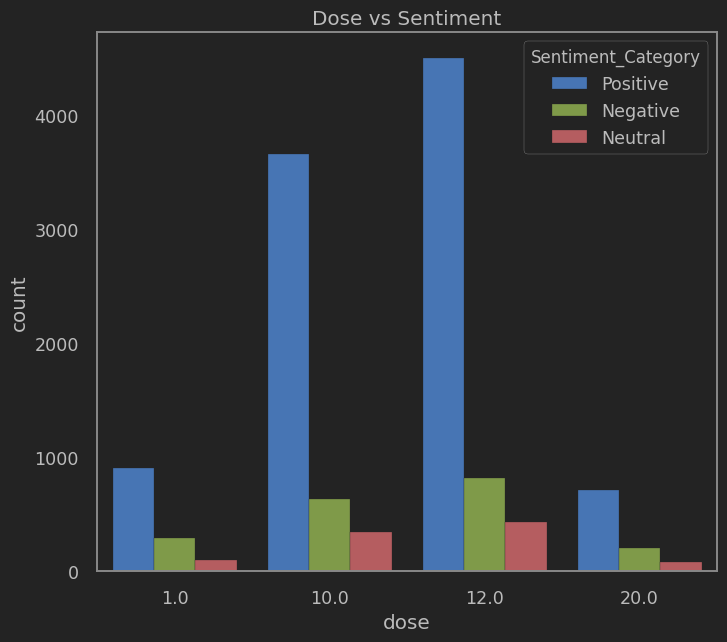

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.title('Dose vs Sentiment')
sns.countplot(x='dose', hue='Sentiment_Category', data=df)

plt.show()


#It could be infered from the graph that does 12mg has the most number of possitive and neutral reviews

In [22]:
df['Sentiment_Category'].value_counts()

Positive    9789
Negative    1951
Neutral      948
Name: Sentiment_Category, dtype: int64

In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')



# Create a custom list of stopwords excluding specific words
custom_stop_words = set(stopwords.words('english')) - {'no', 'not', 'don', "don't", 'doesn', "doesn't", 'didn', "didn't", 'won', "won't", 'wasn', "wasn't", 'isn', "isn't", 'shouldn', "shouldn't", 'hasn', "hasn't", 'hadn', "hadn't", 'mightn', "mightn't", 'mustn', "mustn't", 'can', 'cannot', 'couldn', "couldn't", 'against'}

# Function to preprocess text
def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha() and word not in custom_stop_words]  # Remove non-alphabetic words and custom stop words
    return ' '.join(words)  # Join the list of words into a single string


def preprocess_text1(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha() and word not in custom_stop_words]  # Remove non-alphabetic words and custom stop words
    return words  #


# Apply preprocessing to the "review_text" column
df['cleaned_text'] = df['review_text'].apply(preprocess_text)
df['cleaned_text1'] = df['review_text'].apply(preprocess_text1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# NLTK setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to preprocess and tokenize text
def preprocess_textt(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and len(word) > 2]

    # Remove words starting with a number or containing emojis
    words = [word for word in words if not word[0].isdigit() and not bool(re.search(r'[\u2600-\u26FF\u2700-\u27BF]', word))]

    # Remove words ending with 'i'
    words = [word for word in words if not word.endswith('i')]

    # Part-of-speech tagging to identify non-English sentences
    tagged_words = nltk.pos_tag(words)
    non_english_words = [word for word, tag in tagged_words if tag == 'NN']  # Adjust the condition based on your data
    return words


# Apply preprocessing to the "review_text" column and update in a new column
df['cleaned_text2t'] = df['review_text'].apply(preprocess_textt)


# Function to preprocess and tokenize text
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and len(word) > 2]

    # Remove words starting with a number or containing emojis
    words = [word for word in words if not word[0].isdigit() and not bool(re.search(r'[\u2600-\u26FF\u2700-\u27BF]', word))]

    # Remove words ending with 'i'
    words = [word for word in words if not word.endswith('i')]

    # Part-of-speech tagging to identify non-English sentences
    tagged_words = nltk.pos_tag(words)
    non_english_words = [word for word, tag in tagged_words if tag == 'NN']  # Adjust the condition based on your data

    return " ".join(words)


# Apply preprocessing to the "review_text" column and update in a new column
df['cleaned_text2'] = df['review_text'].apply(preprocess_text)

df['cleaned_text2t'] = df['review_text'].apply(preprocess_textt)


# head a few rows to check the results
df[['review_text','cleaned_text2t','cleaned_text', 'cleaned_text2']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


review_text  \
0  I have always had a problem sleeping and have ...   
1  12mg is WAY too much melatonin. I bought these...   
2  Overall, this is a helpful way for me to fall ...   
3                                         Good taste   
4  Was worried whether it would work or if it wou...   

                                      cleaned_text2t  \
0  [always, problem, sleeping, found, melatonin, ...   
1  [way, much, melatonin, bought, knew, would, re...   
2  [overall, helpful, way, fall, asleep, part, st...   
3                                      [good, taste]   
4  [worried, whether, would, work, would, make, g...   

                                        cleaned_text  \
0  always problem sleeping found melatonin helps ...   
1  way much melatonin bought knew would return wi...   
2  overall helpful way fall asleep part stay asle...   
3                                         good taste   
4  worried whether would work would make groggy n...   

                                       cleaned_text2  
0  always problem sleeping found melatonin helps ...  
1  way much melatonin bought knew would return wi...  
2  overall helpful way fall asleep part stay asle...  
3                                         good taste  
4  worried whether would work would make groggy n...

In [27]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Function to get verbs and negative words from part-of-speech tagging
def get_verbs_and_negatives(text):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    verbs_and_negatives = [word for word, pos in tagged_words if pos.startswith('VB') or word in ["not", "no", "never", "n't","like","good","like","great"]]
    return verbs_and_negatives

# Function to get sentiment scores
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

# Apply functions to the "cleaned_text" column
df['sentiment_score'] = df['cleaned_text2'].apply(get_sentiment_score)

# Display the DataFrame with extracted verbs and negative words, and sentiment scores
df[['cleaned_text', 'sentiment_score']].head(5)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


cleaned_text  sentiment_score
0  always problem sleeping found melatonin helps ...           0.4215
1  way much melatonin bought knew would return wi...           0.4767
2  overall helpful way fall asleep part stay asle...          -0.0516
3                                         good taste           0.4404
4  worried whether would work would make groggy n...           0.5868

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)




# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the cleaned text to obtain TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text2'])

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Create an empty DataFrame to store results
result_df = pd.DataFrame(columns=['dose', 'word', 'score'])

# Display the top words for reactions after eating
top_words_after_eating = tfidf_df.sum().sort_values(ascending=False)[:10]
print("Top words related to reactions after eating:")
print(top_words_after_eating)

# Display the top words for each dose category
dose_categories = [12.0, 10.0, 1.0, 20.0]

# Filter the DataFrame based on the condition
for dose_category in dose_categories:
    subset_df = df[df['dose'] == dose_category]

    # Check if the subset DataFrame is non-empty
    if not subset_df.empty:
        # Use this subset DataFrame to get the corresponding TF-IDF values
        subset_tfidf_matrix = vectorizer.transform(subset_df['cleaned_text'])
        subset_tfidf_df = pd.DataFrame(subset_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
        # Calculate and print top words for the dose category
        words_for_dose = subset_tfidf_df.sum().sort_values(ascending=False)[:10]
        print(f"\nTop words for {dose_category} dose:")
        print(words_for_dose)

        # Iterate through the top words and store them in the result DataFrame
        for word in subset_tfidf_df.sum().sort_values(ascending=False)[:10].index:
            result_df = result_df.append({'dose': dose_category, 'word': word, 'score': subset_tfidf_df[word].sum()}, ignore_index=True)
    else:
        print(f"\nNo data for {dose_category} dose.")

# Display the final result DataFrame
print("\nResult DataFrame:")
result_df.head()


Top words related to reactions after eating:
sleep      761.742546
great      635.735883
works      620.096113
good       566.150397
work       510.610919
product    454.953205
taste      445.901586
asleep     378.848445
like       353.257129
night      339.681199
dtype: float64

Top words for 12.0 dose:
sleep        349.839722
works        341.690628
great        295.702069
good         258.402247
product      212.700938
work         210.882002
asleep       171.524349
taste        168.160557
melatonin    152.698975
like         150.003214
dtype: float64

Top words for 10.0 dose:
sleep      258.590037
great      242.600396
good       212.427179
taste      198.996708
work       192.474261
gummies    172.887498
works      165.244293
product    145.943821
like       145.886616
asleep     142.149863
dtype: float64

Top words for 1.0 dose:
sleep      95.534463
work       70.561335
great      51.746434
works      48.572008
good       48.333952
taste      47.401300
help       45.551954
asleep

dose     word       score
0  12.0    sleep  349.839722
1  12.0    works  341.690628
2  12.0    great  295.702069
3  12.0     good  258.402247
4  12.0  product  212.700938

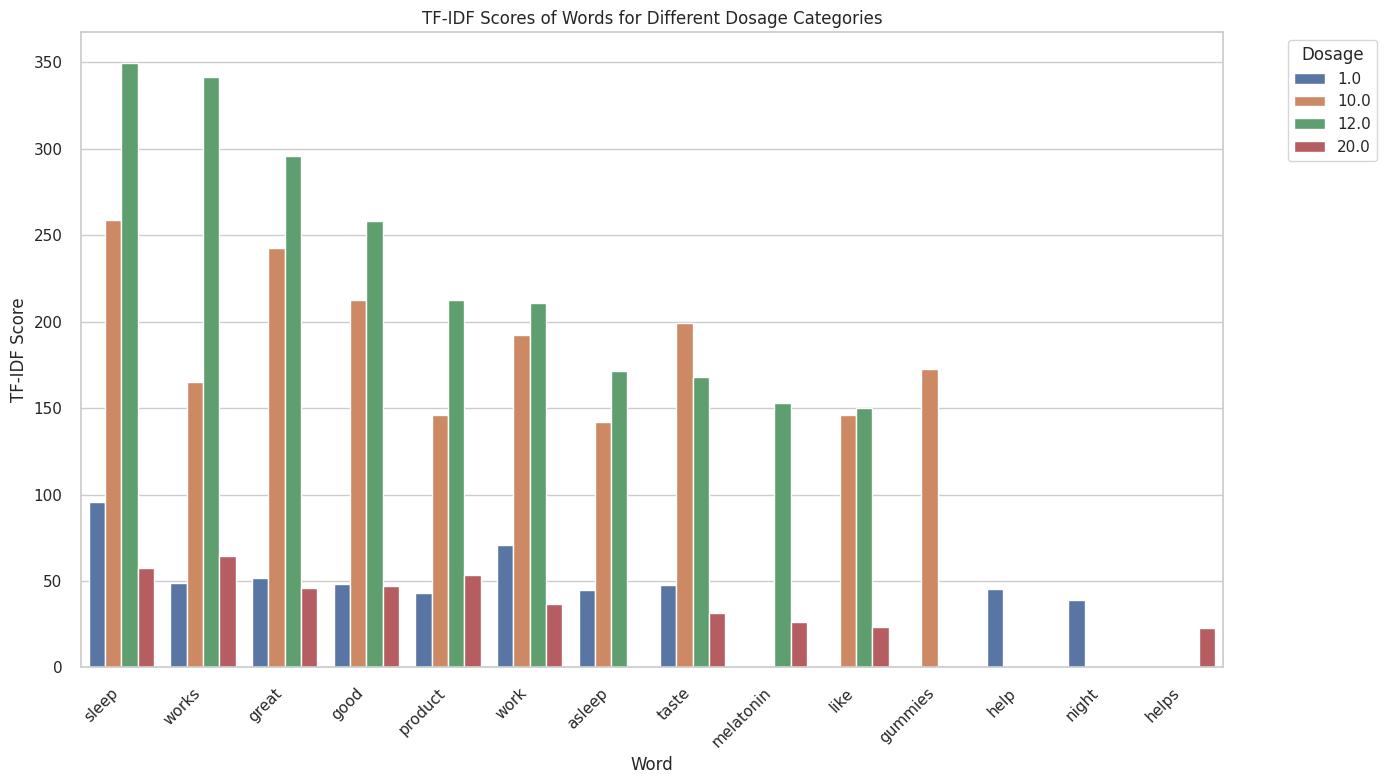

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(14, 8))
plot = sns.barplot(x='word', y='score', hue='dose', data=result_df)

# Set the title and labels
plt.title('TF-IDF Scores of Words for Different Dosage Categories')
plt.xlabel('Word')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')

# Display the legend
plt.legend(title='Dosage', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


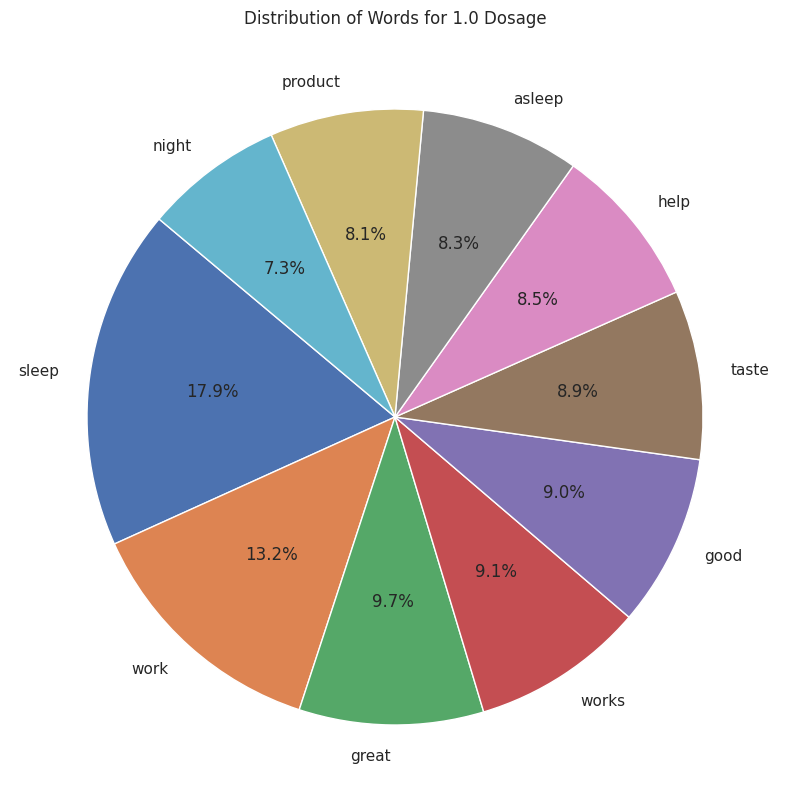

In [30]:
import matplotlib.pyplot as plt


# Filter the DataFrame for the 10.0 dosage
subset_df = result_df[result_df['dose'] == 1.0]

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(subset_df['score'], labels=subset_df['word'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Words for 1.0 Dosage')

# Show the plot
plt.show()

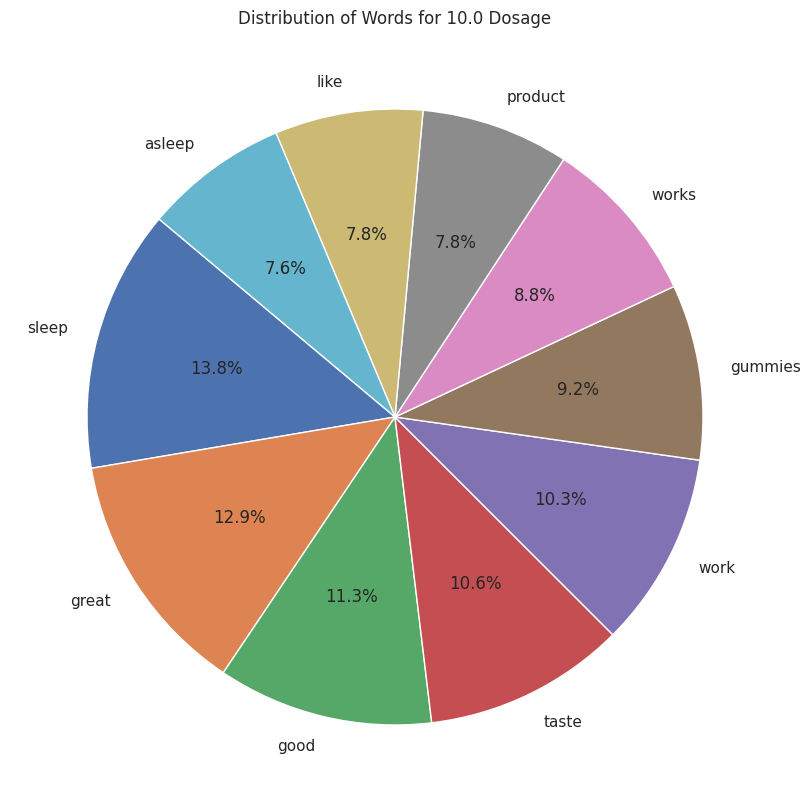

In [31]:
import matplotlib.pyplot as plt


# Filter the DataFrame for the 10.0 dosage
subset_df = result_df[result_df['dose'] == 10.0]

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(subset_df['score'], labels=subset_df['word'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Words for 10.0 Dosage')

# Show the plot
plt.show()


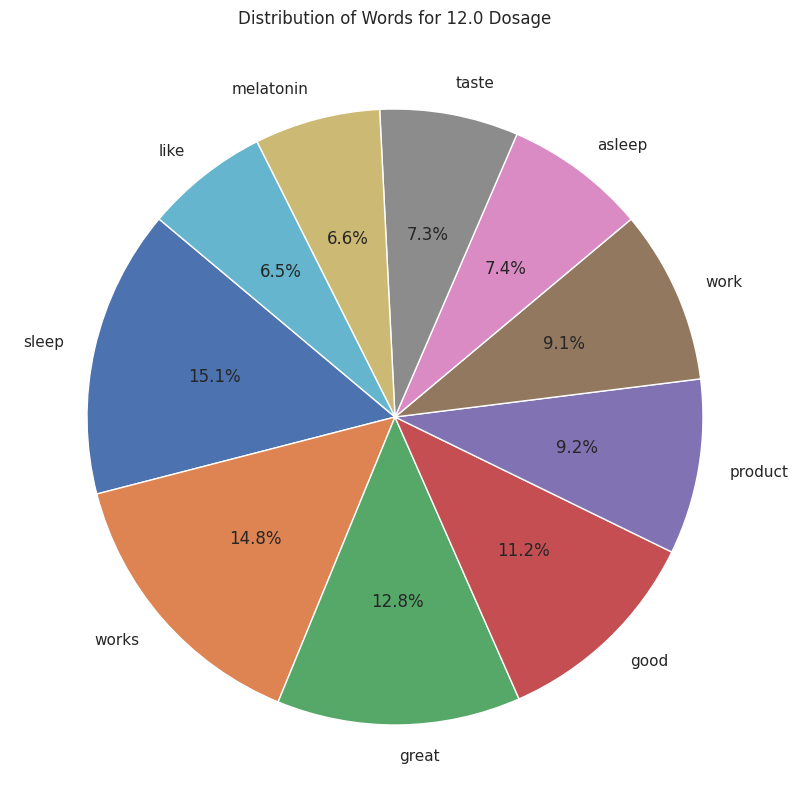

In [32]:
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame

# Filter the DataFrame for the 12.0 dosage
subset_df = result_df[result_df['dose'] == 12.0]

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(subset_df['score'], labels=subset_df['word'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Words for 12.0 Dosage')

# Show the plot
plt.show()


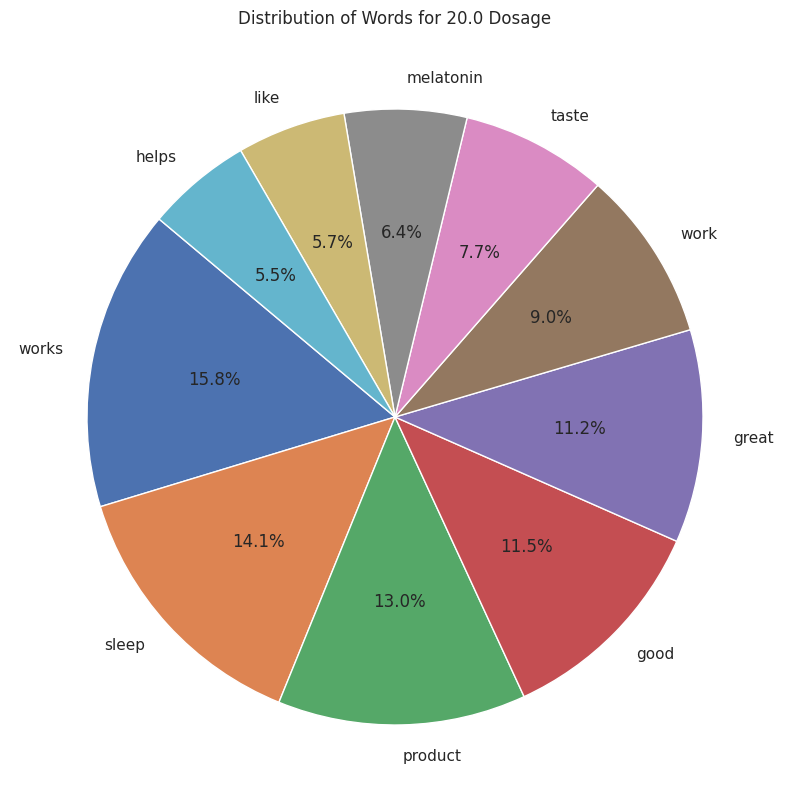

In [33]:
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame

# Filter the DataFrame for the 20.0 dosage
subset_df = result_df[result_df['dose'] == 20.0]

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(subset_df['score'], labels=subset_df['word'], autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Words for 20.0 Dosage')

# Show the plot
plt.show()


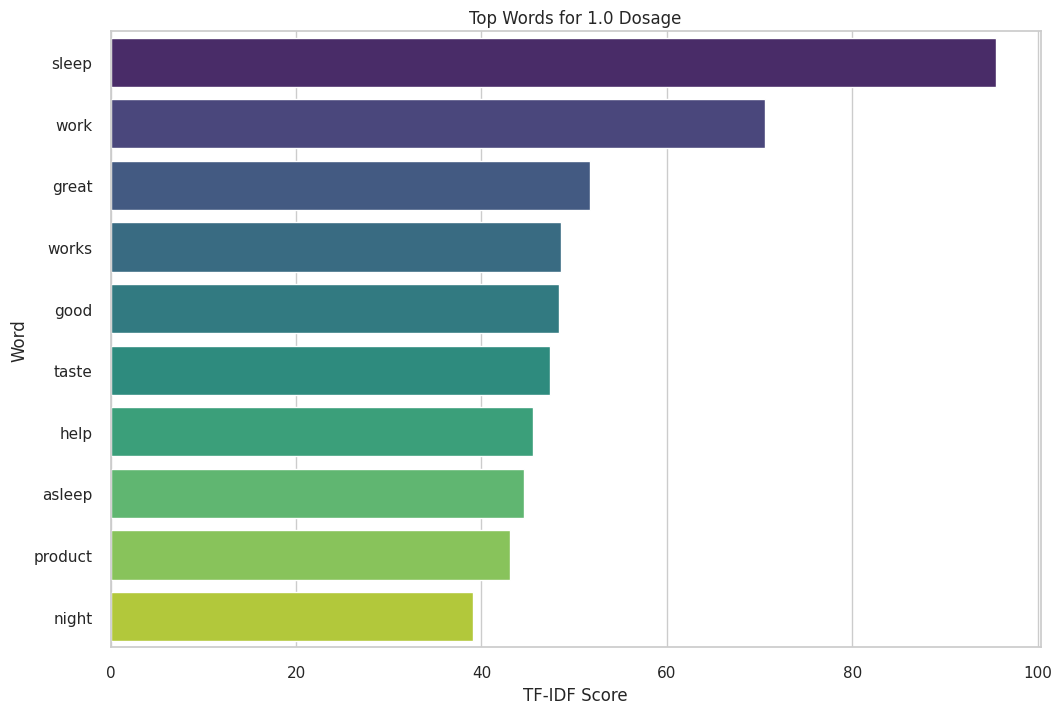

In [34]:
import seaborn as sns


# Filter the DataFrame for the 10.0 dosage
subset_df = result_df[result_df['dose'] == 1.0]

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='word', data=subset_df, palette='viridis')
plt.title('Top Words for 1.0 Dosage')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

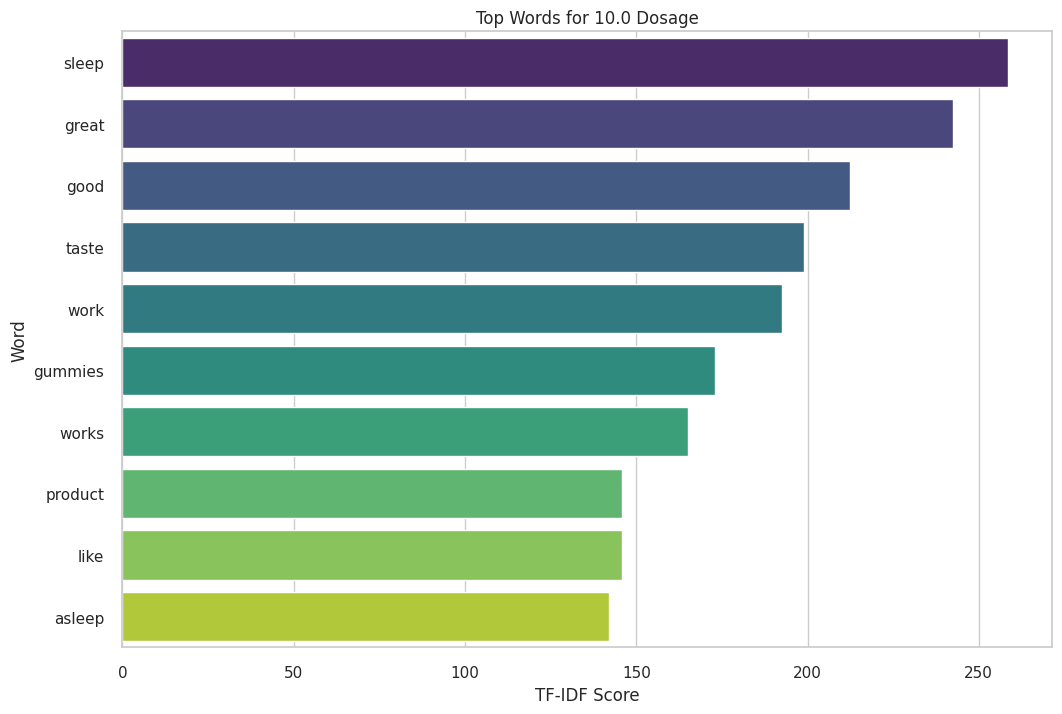

In [35]:
import seaborn as sns


# Filter the DataFrame for the 10.0 dosage
subset_df = result_df[result_df['dose'] == 10.0]

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='word', data=subset_df, palette='viridis')
plt.title('Top Words for 10.0 Dosage')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()


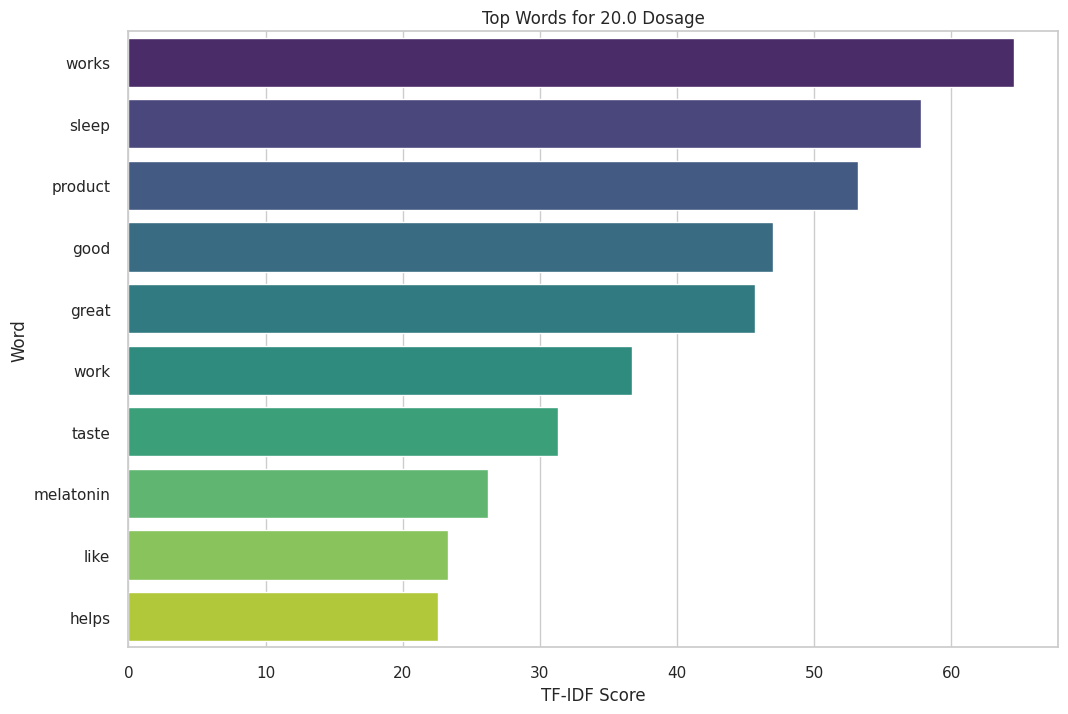

In [36]:
import seaborn as sns

# Filter the DataFrame for the 20.0 dosage
subset_df = result_df[result_df['dose'] == 20.0]

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='word', data=subset_df, palette='viridis')
plt.title('Top Words for 20.0 Dosage')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

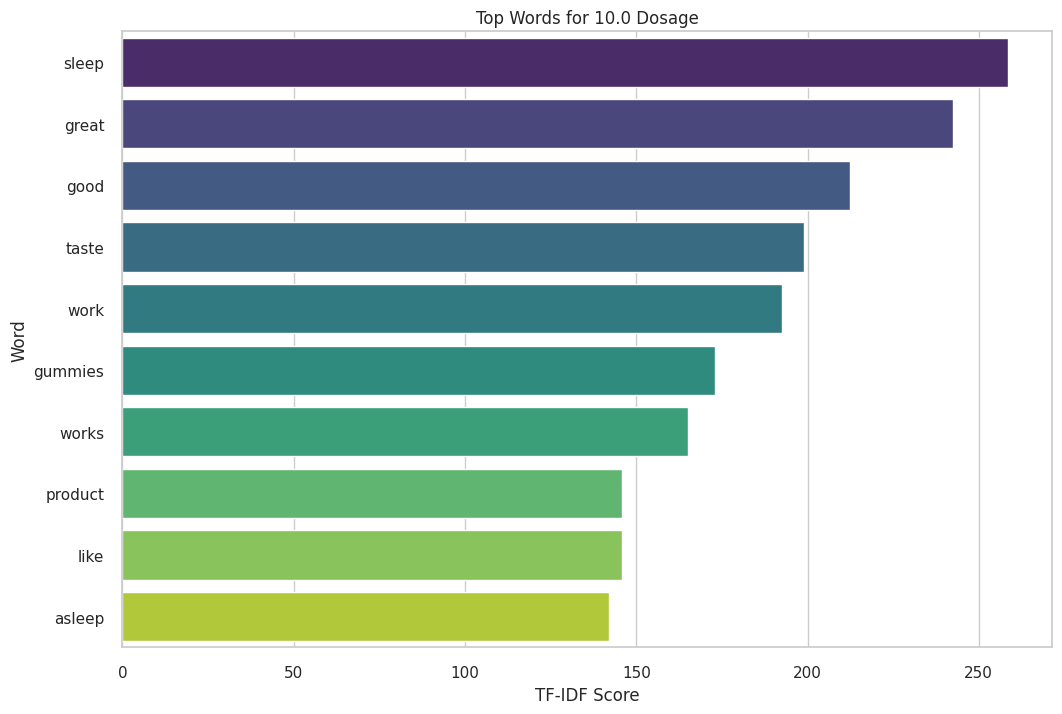

In [37]:
import seaborn as sns


# Filter the DataFrame for the 10.0 dosage
subset_df = result_df[result_df['dose'] == 10.0]

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='word', data=subset_df, palette='viridis')
plt.title('Top Words for 10.0 Dosage')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

In [38]:
!pip install wordcloud

In [39]:
sentences = df['cleaned_text2'].tolist()
len(sentences)

12688

In [40]:
sentences_as_one_string =" ".join(sentences)

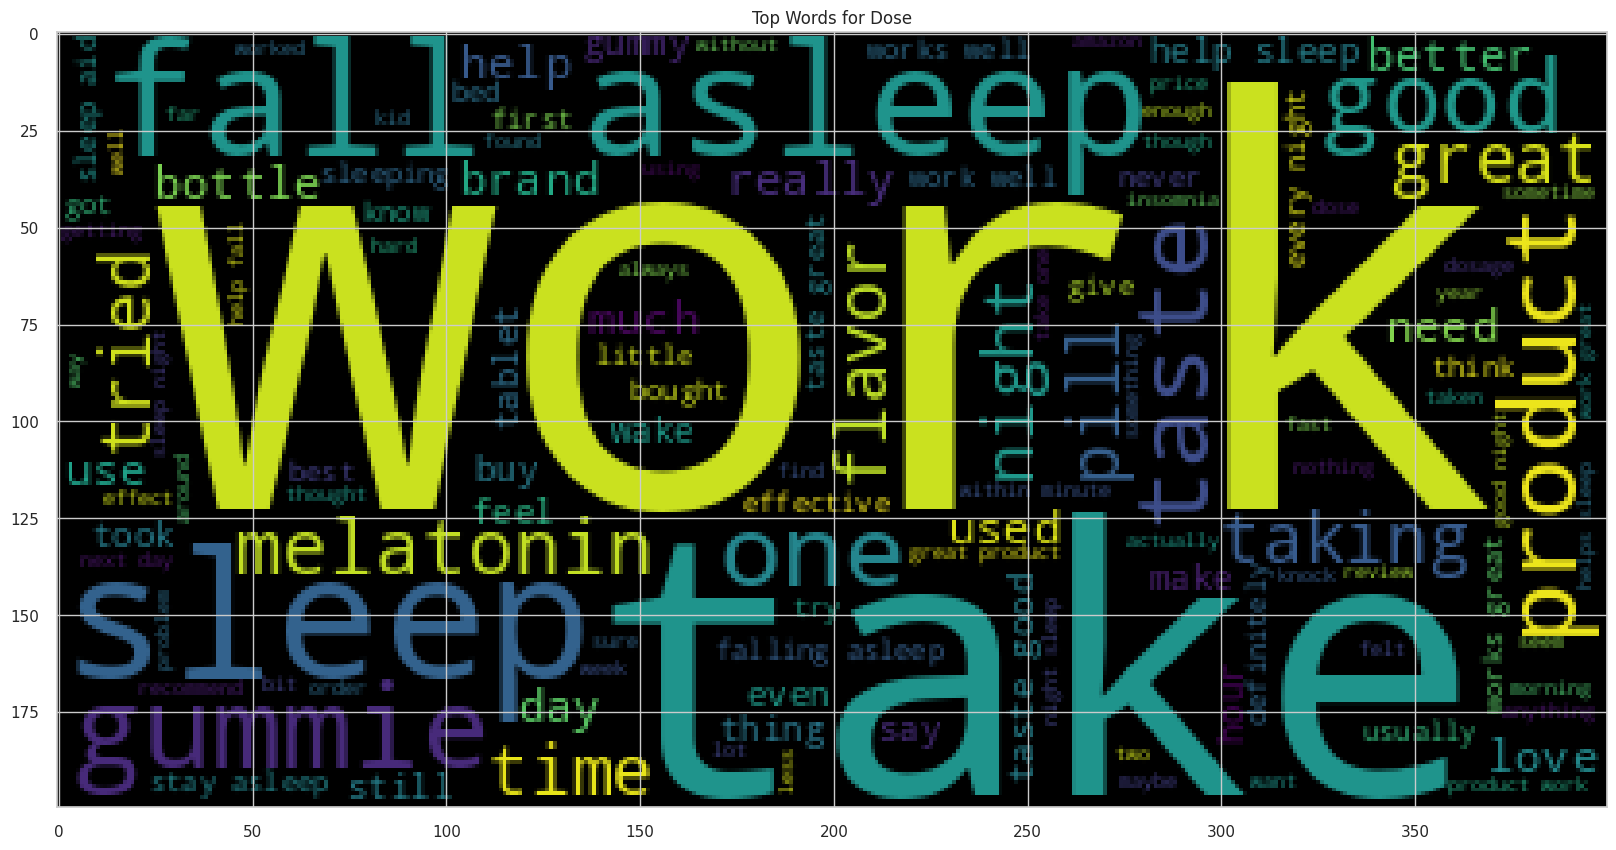

In [41]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.title('Top Words for Dose')
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [42]:
df10 = df[df['dose']==10.0]

In [43]:
sentences = df10['cleaned_text2'].tolist()
len(sentences)

4642

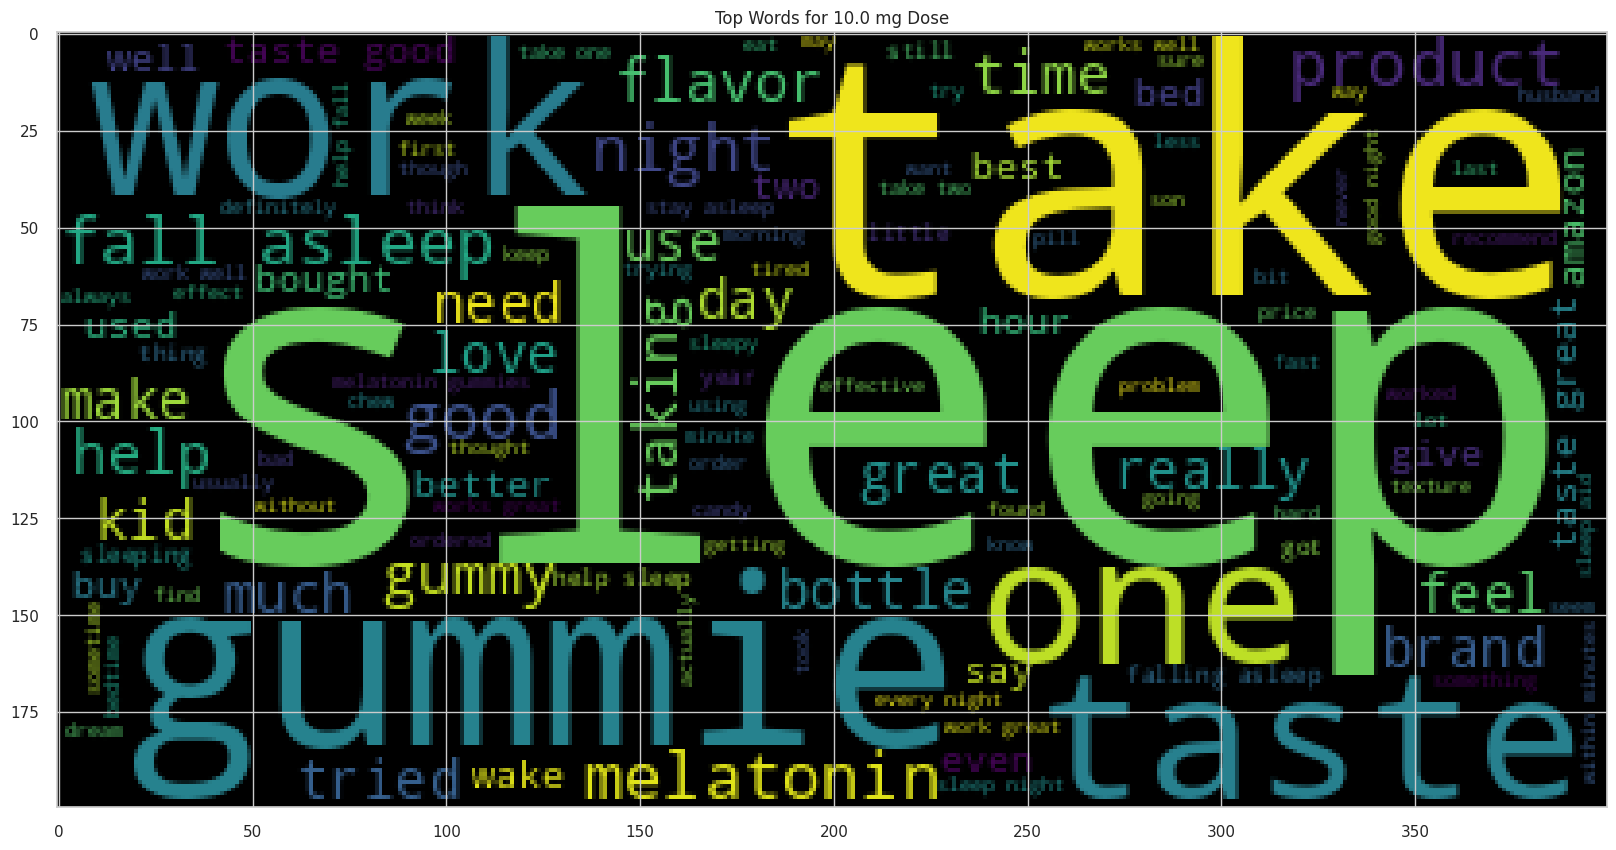

In [44]:
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))
plt.title('Top Words for 10.0 mg Dose')

plt.imshow(WordCloud().generate(sentences_as_one_string))

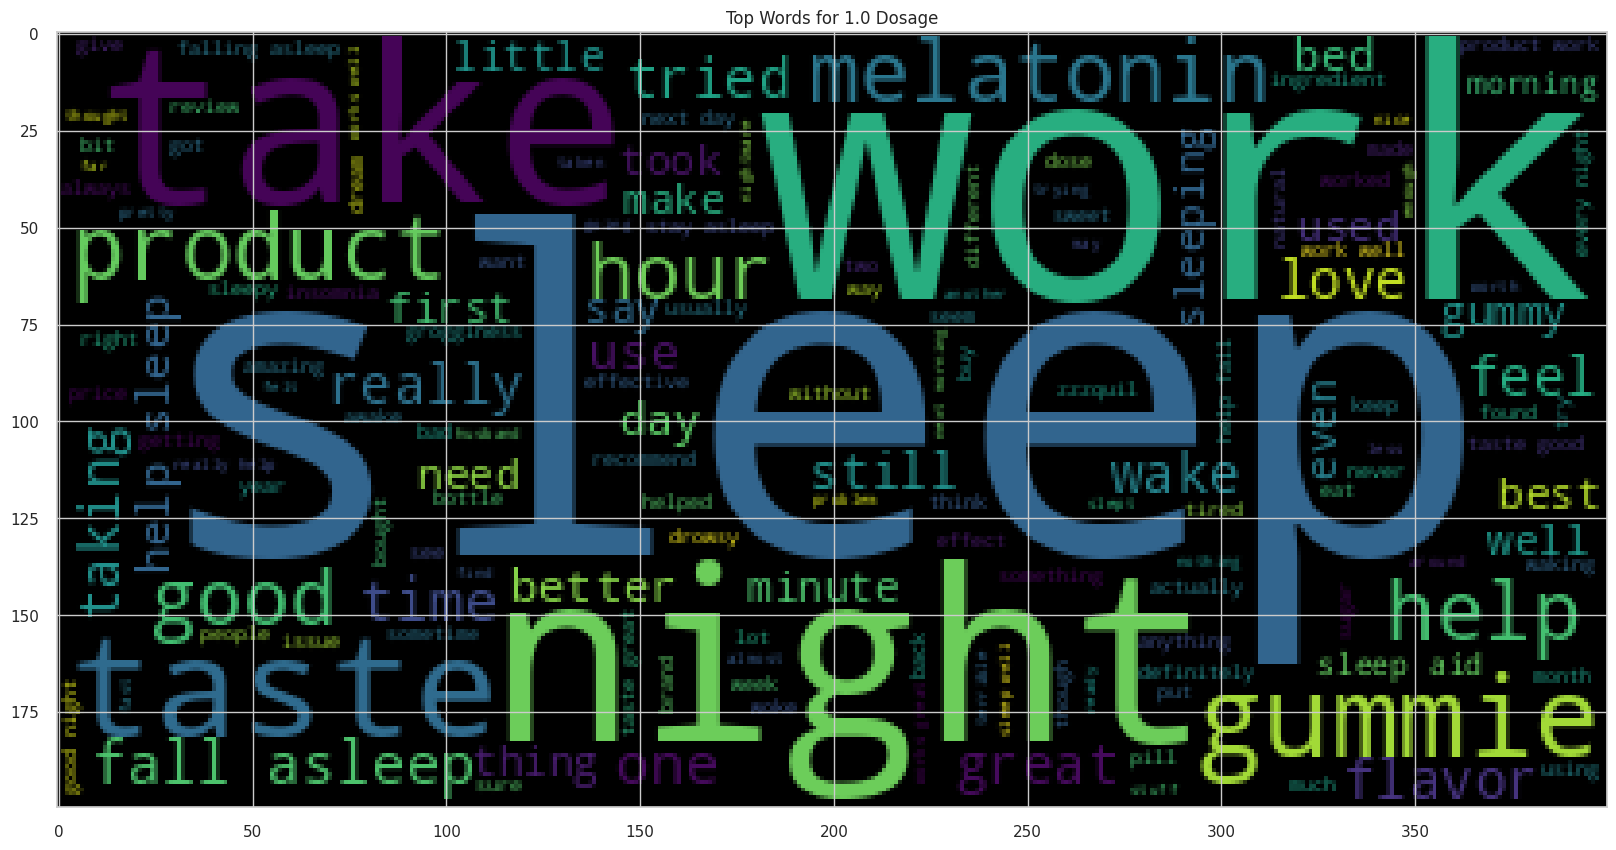

In [45]:
df20 = df[df['dose']==1.0]
sentences = df20['cleaned_text2'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))

plt.title('Top Words for 1.0 Dosage')

plt.imshow(WordCloud().generate(sentences_as_one_string))

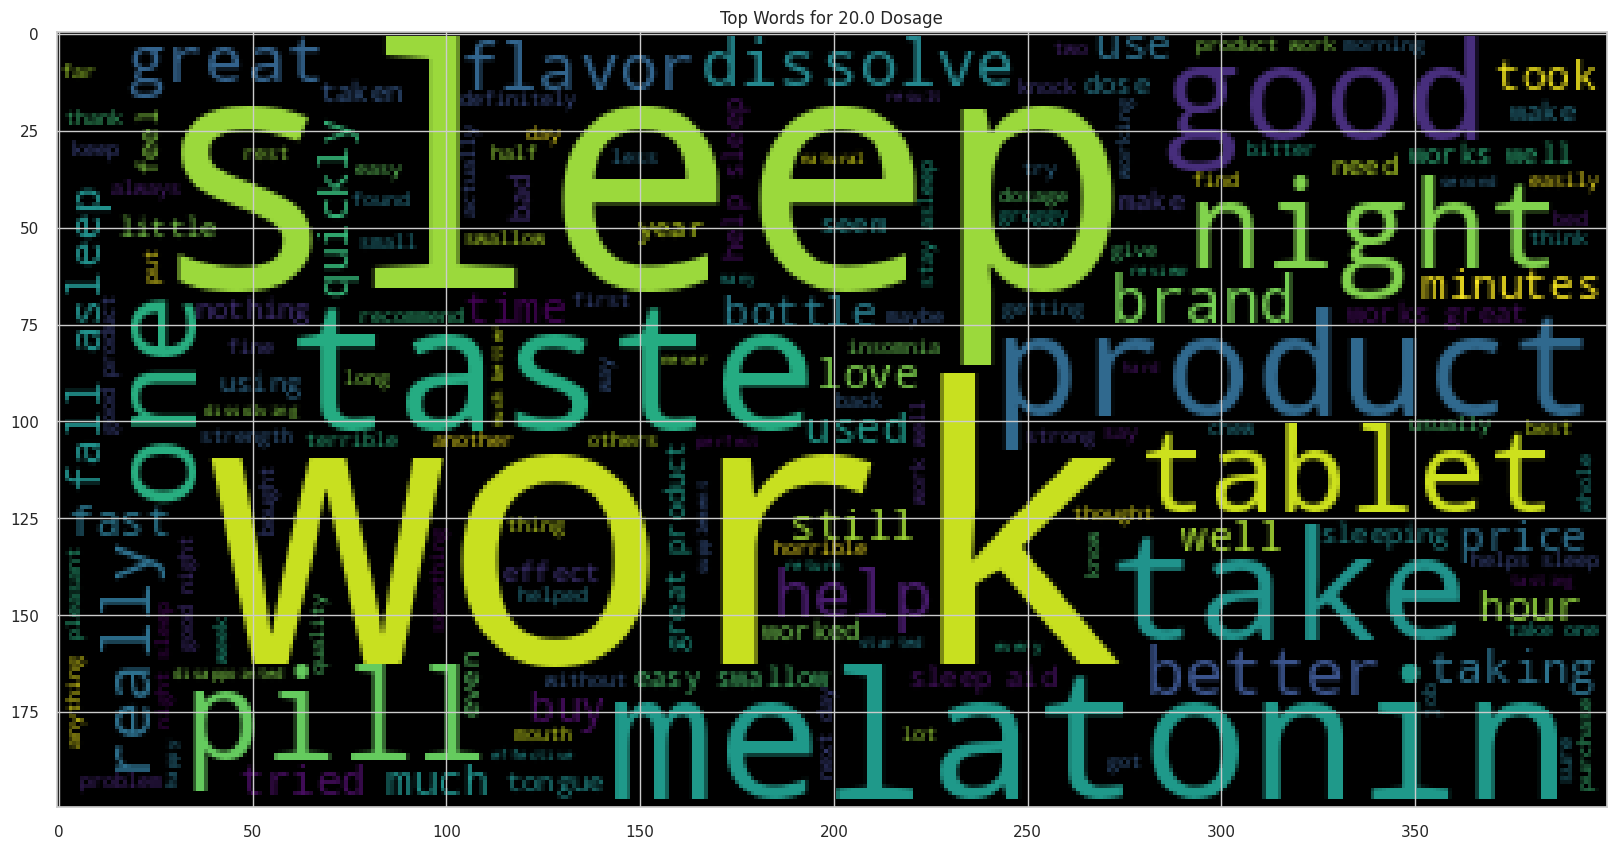

In [46]:
df20 = df[df['dose']==20.0]
sentences = df20['cleaned_text2'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))

plt.title('Top Words for 20.0 Dosage')

plt.imshow(WordCloud().generate(sentences_as_one_string))

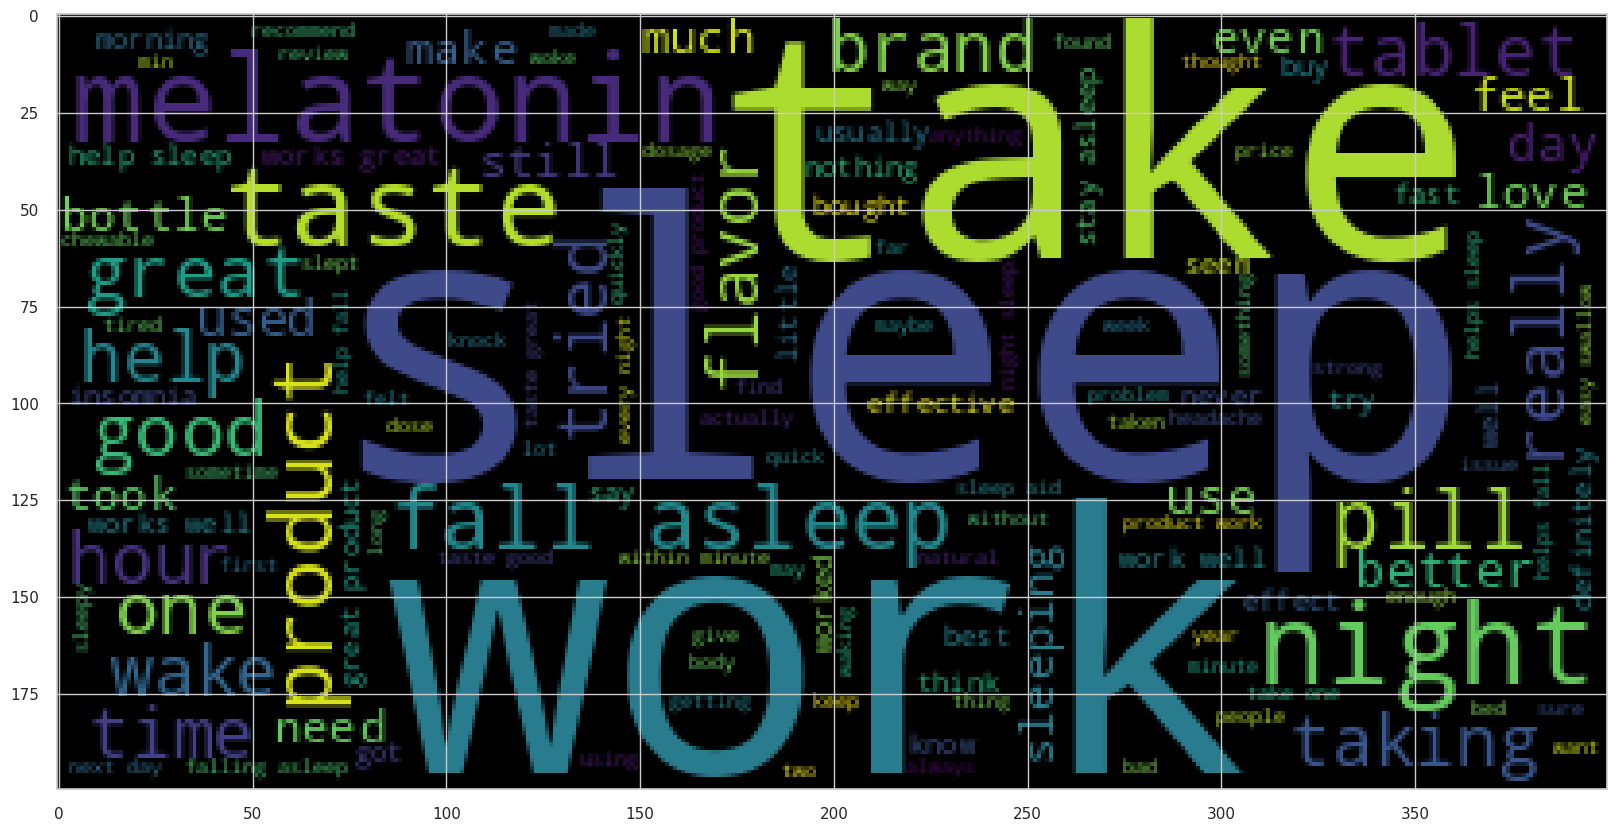

In [47]:
df12 = df[df['dose']==12.0]
sentences = df12['cleaned_text2'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [48]:
# Convert to list format
sentences = df['review_text'].tolist()
len(sentences)

12688

In [49]:
sentences_as_one_string =" ".join(sentences)

In [50]:
sentences_as_one_string

'I have always had a problem sleeping and have found that melatonin helps me to get uninterrupted sleep. Easy to swallow small tablets. 12mg is WAY too much melatonin. I bought these before I knew and I would return them if my window to do so hadn\'t already closed. DO NOT BUY. Studies have shown melatonin to be most effective when dosed between 0.3mg-.5mg or AT MOST 3mg. Overall, this is a helpful way for me to fall asleep and, for the most part, stay asleep at ight. I may look for a smaller dosage pill though because the 12mg works for a while, then it causes me sleep issues. I will half the pill for a week or two & then I\'m able to return to the full dosage. I\'m a lifelong insomnia sufferer due to sleep apnea & medication side effects, but I just reordered, so I intend to keep using this supplement for the next few months at least. Good taste Was worried whether it would work or if it would make me groggy next morning however within 30mins of taking the gummy I am sleepy. I toss a

In [51]:
all_words =[]
def lower(x):
    words = x.lower().split()
    all_words.append(words)

lower(sentences_as_one_string)
all_words


[['i',
  'have',
  'always',
  'had',
  'a',
  'problem',
  'sleeping',
  'and',
  'have',
  'found',
  'that',
  'melatonin',
  'helps',
  'me',
  'to',
  'get',
  'uninterrupted',
  'sleep.',
  'easy',
  'to',
  'swallow',
  'small',
  'tablets.',
  '12mg',
  'is',
  'way',
  'too',
  'much',
  'melatonin.',
  'i',
  'bought',
  'these',
  'before',
  'i',
  'knew',
  'and',
  'i',
  'would',
  'return',
  'them',
  'if',
  'my',
  'window',
  'to',
  'do',
  'so',
  "hadn't",
  'already',
  'closed.',
  'do',
  'not',
  'buy.',
  'studies',
  'have',
  'shown',
  'melatonin',
  'to',
  'be',
  'most',
  'effective',
  'when',
  'dosed',
  'between',
  '0.3mg-.5mg',
  'or',
  'at',
  'most',
  '3mg.',
  'overall,',
  'this',
  'is',
  'a',
  'helpful',
  'way',
  'for',
  'me',
  'to',
  'fall',
  'asleep',
  'and,',
  'for',
  'the',
  'most',
  'part,',
  'stay',
  'asleep',
  'at',
  'ight.',
  'i',
  'may',
  'look',
  'for',
  'a',
  'smaller',
  'dosage',
  'pill',
  'though',


In [52]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [53]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
all_words_clean=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean.append(word)

clean(all_words)
all_words_clean

[['i',
  'have',
  'always',
  'had',
  'a',
  'problem',
  'sleeping',
  'and',
  'have',
  'found',
  'that',
  'melatonin',
  'helps',
  'me',
  'to',
  'get',
  'uninterrupted',
  'sleep.',
  'easy',
  'to',
  'swallow',
  'small',
  'tablets.',
  '12mg',
  'is',
  'way',
  'too',
  'much',
  'melatonin.',
  'i',
  'bought',
  'these',
  'before',
  'i',
  'knew',
  'and',
  'i',
  'would',
  'return',
  'them',
  'if',
  'my',
  'window',
  'to',
  'do',
  'so',
  "hadn't",
  'already',
  'closed.',
  'do',
  'not',
  'buy.',
  'studies',
  'have',
  'shown',
  'melatonin',
  'to',
  'be',
  'most',
  'effective',
  'when',
  'dosed',
  'between',
  '0.3mg-.5mg',
  'or',
  'at',
  'most',
  '3mg.',
  'overall,',
  'this',
  'is',
  'a',
  'helpful',
  'way',
  'for',
  'me',
  'to',
  'fall',
  'asleep',
  'and,',
  'for',
  'the',
  'most',
  'part,',
  'stay',
  'asleep',
  'at',
  'ight.',
  'i',
  'may',
  'look',
  'for',
  'a',
  'smaller',
  'dosage',
  'pill',
  'though',


In [55]:
flattened_words = [word for review in all_words_clean for word in review]


In [56]:
filtered_words = [word for word in flattened_words if word not in stopwords]
filtered_words = [word for word in filtered_words if len(word) > 2]

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]


from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
filtered_words = [stemmer.stem(word) for word in filtered_words]

tagged_words = nltk.pos_tag(filtered_words)
filtered_words = [word for word, tag in tagged_words if tag not in ['NN', 'NNS'] and not word.endswith('i')]

filtered_words = [word for word in filtered_words if word.isalpha()]


In [57]:
filtered_words

['alway',
 'found',
 'get',
 'uninterrupt',
 'swallow',
 'small',
 'much',
 'bought',
 'would',
 'return',
 'window',
 'shown',
 'melatonin',
 'dose',
 'fall',
 'asleep',
 'stay',
 'asleep',
 'may',
 'look',
 'smaller',
 'though',
 'caus',
 'sleep',
 'two',
 'return',
 'full',
 'lifelong',
 'due',
 'sleep',
 'medic',
 'intend',
 'supplement',
 'next',
 'good',
 'whether',
 'would',
 'work',
 'would',
 'make',
 'next',
 'within',
 'toss',
 'surpris',
 'felt',
 'next',
 'feel',
 'also',
 'love',
 'take',
 'one',
 'good',
 'good',
 'get',
 'like',
 'still',
 'struggl',
 'stay',
 'asleep',
 'howev',
 'quiet',
 'enough',
 'good',
 'right',
 'receiv',
 'right',
 'top',
 'serial',
 'feel',
 'mislead',
 'take',
 'two',
 'differ',
 'one',
 'strong',
 'next',
 'gradual',
 'spent',
 'without',
 'much',
 'serious',
 'without',
 'late',
 'feel',
 'tire',
 'next',
 'sleep',
 'stay',
 'awak',
 'take',
 'two',
 'best',
 'also',
 'like',
 'much',
 'take',
 'take',
 'usual',
 'feel',
 'take',
 'much',
 

In [58]:
import nltk
from nltk import FreqDist

all_words_freq = FreqDist(filtered_words)


In [59]:

all_words_freq




FreqDist({'take': 3475, 'sleep': 3261, 'like': 2305, 'good': 1804, 'great': 1744, 'get': 1681, 'one': 1513, 'asleep': 1457, 'well': 895, 'would': 881, ...})

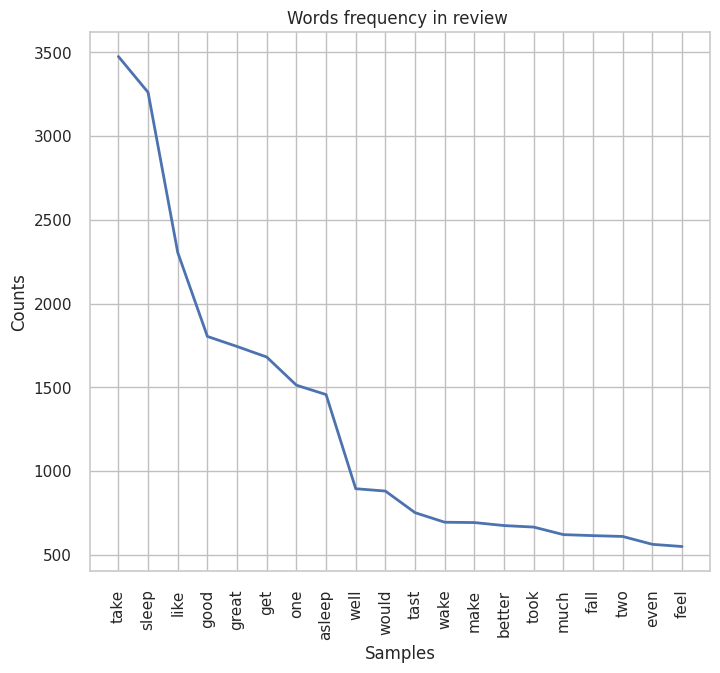

In [60]:
import matplotlib.pyplot as plt
plt.title('Words frequency in review ')

all_words_freq.plot(20, cumulative=False)
plt.show()


In [61]:
filtered_words

['alway',
 'found',
 'get',
 'uninterrupt',
 'swallow',
 'small',
 'much',
 'bought',
 'would',
 'return',
 'window',
 'shown',
 'melatonin',
 'dose',
 'fall',
 'asleep',
 'stay',
 'asleep',
 'may',
 'look',
 'smaller',
 'though',
 'caus',
 'sleep',
 'two',
 'return',
 'full',
 'lifelong',
 'due',
 'sleep',
 'medic',
 'intend',
 'supplement',
 'next',
 'good',
 'whether',
 'would',
 'work',
 'would',
 'make',
 'next',
 'within',
 'toss',
 'surpris',
 'felt',
 'next',
 'feel',
 'also',
 'love',
 'take',
 'one',
 'good',
 'good',
 'get',
 'like',
 'still',
 'struggl',
 'stay',
 'asleep',
 'howev',
 'quiet',
 'enough',
 'good',
 'right',
 'receiv',
 'right',
 'top',
 'serial',
 'feel',
 'mislead',
 'take',
 'two',
 'differ',
 'one',
 'strong',
 'next',
 'gradual',
 'spent',
 'without',
 'much',
 'serious',
 'without',
 'late',
 'feel',
 'tire',
 'next',
 'sleep',
 'stay',
 'awak',
 'take',
 'two',
 'best',
 'also',
 'like',
 'much',
 'take',
 'take',
 'usual',
 'feel',
 'take',
 'much',
 

In [62]:
df.head()

review_rating  dose                                        review_text  \
0              5  12.0  I have always had a problem sleeping and have ...   
1              1  12.0  12mg is WAY too much melatonin. I bought these...   
2              4  12.0  Overall, this is a helpful way for me to fall ...   
3              5  12.0                                         Good taste   
4              5   1.0  Was worried whether it would work or if it wou...   

    rating_label  Sentiment Sentiment_Category  \
0  Very Positive   0.295455           Positive   
1  Very Negative  -0.390000           Negative   
2       Positive   0.227273           Positive   
3  Very Positive   0.295455           Positive   
4  Very Positive   0.295455           Positive   

                                        cleaned_text  \
0  always problem sleeping found melatonin helps ...   
1  way much melatonin bought knew would return wi...   
2  overall helpful way fall asleep part stay asle...   
3                                         good taste   
4  worried whether would work would make groggy n...   

                                       cleaned_text1  \
0  [always, problem, sleeping, found, melatonin, ...   
1  [way, much, melatonin, bought, knew, would, re...   
2  [overall, helpful, way, fall, asleep, part, st...   
3                                      [good, taste]   
4  [worried, whether, would, work, would, make, g...   

                                      cleaned_text2t  \
0  [always, problem, sleeping, found, melatonin, ...   
1  [way, much, melatonin, bought, knew, would, re...   
2  [overall, helpful, way, fall, asleep, part, st...   
3                                      [good, taste]   
4  [worried, whether, would, work, would, make, g...   

                                       cleaned_text2  sentiment_score  
0  always problem sleeping found melatonin helps ...           0.4215  
1  way much melatonin bought knew would return wi...           0.4767  
2  overall helpful way fall asleep part stay asle...          -0.0516  
3                                         good taste           0.4404  
4  worried whether would work would make groggy n...           0.5868

In [63]:


from collections import Counter

word_features = []

def common_features(x):
    # Convert the list to a Counter object
    word_counter = Counter(x)

    # Get the most common 2000 words
    for item in word_counter.most_common(2000):
        word_features.append(item[0])

# Assuming filtered_words is a list of words
common_features(filtered_words)
print(word_features)


['take', 'sleep', 'like', 'good', 'great', 'get', 'one', 'asleep', 'well', 'would', 'tast', 'wake', 'make', 'better', 'took', 'much', 'fall', 'two', 'even', 'feel', 'still', 'first', 'best', 'love', 'seem', 'need', 'give', 'also', 'next', 'within', 'buy', 'recommend', 'back', 'usual', 'fast', 'say', 'put', 'want', 'hard', 'bad', 'go', 'without', 'never', 'bought', 'got', 'melatonin', 'last', 'keep', 'actual', 'could', 'help', 'think', 'sure', 'know', 'find', 'found', 'stay', 'right', 'taken', 'made', 'bed', 'alway', 'use', 'long', 'anoth', 'ever', 'woke', 'littl', 'felt', 'swallow', 'dissolv', 'morn', 'may', 'dose', 'almost', 'far', 'noth', 'notic', 'thought', 'normal', 'whole', 'enough', 'nice', 'full', 'natur', 'old', 'per', 'slept', 'someth', 'around', 'least', 'small', 'troubl', 'though', 'read', 'work', 'strong', 'start', 'gave', 'see', 'second', 'differ', 'super', 'went', 'come', 'quick', 'instead', 'other', 'abl', 'rest', 'due', 'might', 'longer', 'chew', 'final', 'weird', 'expe

In [64]:
word_counts = Counter(word_features)
word_counts

Counter({'take': 1,
         'sleep': 1,
         'like': 1,
         'good': 1,
         'great': 1,
         'get': 1,
         'one': 1,
         'asleep': 1,
         'well': 1,
         'would': 1,
         'tast': 1,
         'wake': 1,
         'make': 1,
         'better': 1,
         'took': 1,
         'much': 1,
         'fall': 1,
         'two': 1,
         'even': 1,
         'feel': 1,
         'still': 1,
         'first': 1,
         'best': 1,
         'love': 1,
         'seem': 1,
         'need': 1,
         'give': 1,
         'also': 1,
         'next': 1,
         'within': 1,
         'buy': 1,
         'recommend': 1,
         'back': 1,
         'usual': 1,
         'fast': 1,
         'say': 1,
         'put': 1,
         'want': 1,
         'hard': 1,
         'bad': 1,
         'go': 1,
         'without': 1,
         'never': 1,
         'bought': 1,
         'got': 1,
         'melatonin': 1,
         'last': 1,
         'keep': 1,
         'actual': 1,


In [65]:
keywords_of_interest = [
    'good', 'sleep', 'dissolve', 'tasty', 'helpful', 'no', 'help',
    'great', 'value', 'impressed', 'falling', 'asleep', 'stay', 'asleep', 'does', 'not', 'seem', 'like', 'helping',
    'quickly', 'wonderful', 'taste', 'fall', 'asleep', 'within', 'minutes', 'not', 'taste', 'like', 'sleep', 'normal', 'brand',
    'always', 'wake', 'hoping', 'back', 'sleep', 'easy', 'take', 'small', 'and', 'easy', 'take', 'flavor', 'okay',
    'great', 'amount', 'make', 'tired', 'fast', 'dissolving', 'excellent', 'product', 'work', 'better', 'great', 'taste', 'best', 'ones', 'found', 'love', 'flavor',
    'good', 'nights', 'rest', 'helps', 'sleep', 'better', 'worked', 'well', 'would', 'help', 'fall', 'asleep', 'slept', 'better', 'without'
]

# Extract keywords and their occurrences
relevant_keywords = {keyword: word_counts[keyword] for keyword in keywords_of_interest}

print("Keywords and their occurrences:")
for keyword, count in relevant_keywords.items():
    print(f"{keyword}: {count}")

Keywords and their occurrences:
good: 1
sleep: 1
dissolve: 0
tasty: 0
helpful: 0
no: 1
help: 1
great: 1
value: 0
impressed: 0
falling: 0
asleep: 1
stay: 1
does: 0
not: 0
seem: 1
like: 1
helping: 0
quickly: 0
wonderful: 0
taste: 0
fall: 1
within: 1
minutes: 0
normal: 1
brand: 0
always: 0
wake: 1
hoping: 0
back: 1
easy: 0
take: 1
small: 1
and: 0
flavor: 1
okay: 1
amount: 0
make: 1
tired: 1
fast: 1
dissolving: 0
excellent: 0
product: 0
work: 1
better: 1
best: 1
ones: 0
found: 1
love: 1
nights: 0
rest: 1
helps: 0
worked: 0
well: 1
would: 1
slept: 1
without: 1


In [66]:
documents = []

def docs(x):
    for index, row in x.iterrows():
        dose = row['dose']
        cleaned_text = row['cleaned_text2t']
        documents.append((cleaned_text, dose))

docs(df)


In [67]:
import random
random.shuffle(documents)

In [68]:
documents

[(['dear',
   'melatonin',
   'gummies',
   'love',
   'theee',
   'flavor',
   'far',
   'best',
   'consistency',
   'gooey',
   'stick',
   'teeth',
   'con',
   'taste',
   'good',
   'forget',
   'taking',
   'melatonin',
   'want'],
  10.0),
 (['believe',
   'butter',
   'version',
   'melatonin',
   'melatonin',
   'products',
   'ever',
   'tried',
   'impossible',
   'wake',
   'without',
   'feeling',
   'grocky',
   'highly',
   'recommend',
   'works',
   'wonderfully',
   'good',
   'night',
   'routine'],
  12.0),
 (['contains', 'silica', 'beware', 'additive', 'causes', 'cancer'], 12.0),
 (['usually',
   'buy',
   'walmart',
   'went',
   'ahead',
   'got',
   'bigger',
   'container',
   'received',
   'taste',
   'horrible',
   'almost',
   'dirt',
   'taste'],
  10.0),
 (['great', 'brand'], 10.0),
 (['use',
   'product',
   'sleep',
   'sometimes',
   'helps',
   'sometimes',
   'reccommend',
   'taking',
   'daily',
   'like',
   'defeats',
   'purpose',
   'taking',


In [69]:
def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features'
        # defined before
    return features

In [70]:
featuresets=[]
def processed(x):
    for (d,c) in x:
        featuresets.append((document_features(d),c))

processed(documents)

In [71]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [72]:
print(nltk.classify.accuracy(classifier,test_set))

0.53


In [73]:
classifier.show_most_informative_features(20)

Most Informative Features
      contains(valerian) = True              1.0 : 10.0   =     25.1 : 1.0
       contains(zzzquil) = True              1.0 : 10.0   =     24.3 : 1.0
         contains(syrup) = True              1.0 : 12.0   =     22.2 : 1.0
        contains(herbal) = True              1.0 : 12.0   =     19.2 : 1.0
        contains(liquid) = True              1.0 : 12.0   =     18.4 : 1.0
        contains(tablet) = True             12.0 : 10.0   =     18.3 : 1.0
          contains(soft) = True             10.0 : 12.0   =     16.9 : 1.0
           contains(red) = True              1.0 : 12.0   =     16.3 : 1.0
       contains(highest) = True             20.0 : 10.0   =     14.0 : 1.0
        contains(weaker) = True             20.0 : 12.0   =     13.5 : 1.0
      contains(diarrhea) = True              1.0 : 12.0   =     13.3 : 1.0
          contains(melt) = True             20.0 : 1.0    =     12.6 : 1.0
      contains(daughter) = True             10.0 : 20.0   =     12.5 : 1.0

In [74]:
from nltk.classify import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk

# Assuming 'featuresets' is a list of tuples where each tuple contains (features, label)

# Split the data into training and testing sets
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Train the logistic regression classifier using SklearnClassifier
classifier = SklearnClassifier(LogisticRegression())
classifier.train(train_set)

# Evaluate the classifier
accuracy = nltk.classify.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5354609929078015


In [75]:
import string
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [77]:
reviews_df_clean = df['review_text'].apply(message_cleaning)

In [78]:
reviews_df_clean

0        [always, problem, sleeping, found, melatonin, ...
1        g, WAY, much, melatonin, bought, knew, wou...
2        [Overall, helpful, way, fall, asleep, part, st...
3                                            [Good, taste]
4        [worried, whether, would, work, would, make, g...
                               ...                        
15905    [like, tastes, like, strawberry, easy, swallow...
15906                                                 [🥇👍]
15907    [Helps, girlfriend, fall, fast, asleep, Stop, ...
15908                                    [sleep, Terrible]
15909    [reason, brand, melatonin, work, purchased, br...
Name: review_text, Length: 12688, dtype: object

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
!pip install emoji



In [80]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(df['review_text'])

# Filter out features that start with a number or contain emojis
filtered_feature_names = [word for word in vectorizer.get_feature_names_out() if word.isalpha() and not bool(re.search(r'\d', word)) and not bool(re.search(r'[\u2600-\u26FF\u2700-\u27BF]', word))]

# Update the vocabulary of the vectorizer with the filtered feature names
vectorizer.vocabulary_ = {word: idx for idx, word in enumerate(filtered_feature_names)}

# Transform the reviews again using the updated vectorizer
reviews_countvectorizer = vectorizer.transform(df['review_text'])

# Print the updated feature names
print(vectorizer.get_feature_names_out())

['ABSOLUTE' 'ABSOLUTELY' 'ACTUALLY' ... '𝐋𝐢𝐤𝐞𝐝' '𝐩𝐫𝐨𝐝𝐮𝐜𝐭' '𝐭𝐡𝐢𝐬']


In [81]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [82]:
reviews_countvectorizer.shape

(12688, 11279)

In [83]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [84]:
X = reviews

In [85]:
y = df['dose']
y

0        12.0
1        12.0
2        12.0
3        12.0
4         1.0
         ... 
15905    10.0
15906    12.0
15907    12.0
15908    20.0
15909    12.0
Name: dose, Length: 12688, dtype: float64

MultinomialNB

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [88]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your Naive Bayes classifier
y_pred = NB_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Multinomial Naiyve Bayes: ", accuracy)


Accuracy of Multinomial Naiyve Bayes:  0.5795902285263987


In [89]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

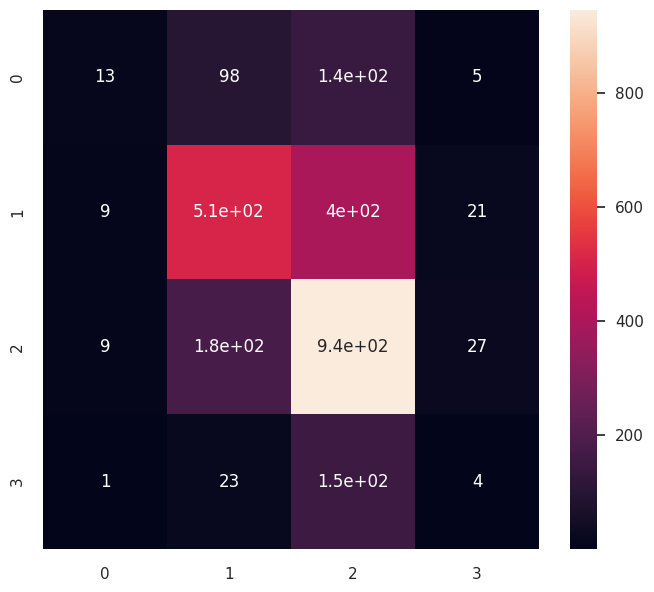

In [90]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         1.0       0.41      0.05      0.09       260
        10.0       0.63      0.54      0.58       941
        12.0       0.58      0.81      0.68      1160
        20.0       0.07      0.02      0.03       177

    accuracy                           0.58      2538
   macro avg       0.42      0.36      0.34      2538
weighted avg       0.54      0.58      0.54      2538



LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic regrssion: 0.5807722616233254
              precision    recall  f1-score   support

         1.0       0.32      0.12      0.17       260
        10.0       0.62      0.55      0.58       941
        12.0       0.59      0.79      0.67      1160
        20.0       0.17      0.04      0.06       177

    accuracy                           0.58      2538
   macro avg       0.42      0.37      0.37      2538
weighted avg       0.54      0.58      0.55      2538



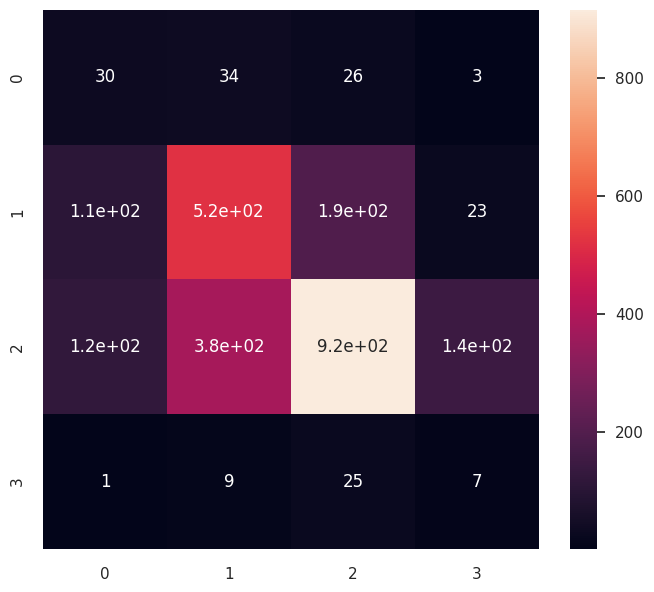

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic regrssion:", accuracy)

print(classification_report(y_test, y_pred))

In [93]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[2,1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 10","Actual - 12","Actual - 1","Actual - 20"]],
                  columns = [i for i in ['Predicted - 10','Predicted - 12','Predicted - 20','Predicted - 20']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [94]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model: classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train, average='weighted')
    test_recall = metrics.recall_score(y_test, pred_test, average='weighted')

    train_precision = metrics.precision_score(y_train, pred_train, average='weighted')
    test_precision = metrics.precision_score(y_test, pred_test, average='weighted')

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))

    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag:
        print("Accuracy on training set: ", train_acc)
        print("Accuracy on test set: ", test_acc)
        print("Recall on training set: ", train_recall)
        print("Recall on test set: ", test_recall)
        print("Precision on training set: ", train_precision)
        print("Precision on test set: ", test_precision)

    return score_list


AdaBoost Classifier

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [96]:

abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [97]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = abc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy Score on Test Set: {accuracy:.4f}")


Accuracy Score on Test Set: 0.5721


In [98]:
abc_score=get_metrics_score(abc)


Accuracy on training set:  0.5710344827586207
Accuracy on test set:  0.5721040189125296
Recall on training set:  0.5710344827586207
Recall on test set:  0.5721040189125296
Precision on training set:  0.5792168306569732
Precision on test set:  0.553460699595286


Hyperparameter Tuning

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined before this point
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()  # saga solver requires features to be scaled for model convergence

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of iterations
logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Print accuracy
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f'Accuracy of logistic regression classifier on train set: {train_accuracy:.2f}')
print(f'Accuracy of logistic regression classifier on test set: {test_accuracy:.2f}')


Accuracy of logistic regression classifier on train set: 0.78
Accuracy of logistic regression classifier on test set: 0.58


In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.41      0.10      0.16       259
        10.0       0.61      0.56      0.58       928
        12.0       0.57      0.79      0.66      1151
        20.0       0.23      0.03      0.05       200

    accuracy                           0.58      2538
   macro avg       0.46      0.37      0.37      2538
weighted avg       0.54      0.58      0.54      2538



Random forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Assuming you have X and y defined before this point
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest classifier on test set: {accuracy_rf:.2f}')

# Print classification report
print(classification_report(y_test, y_pred_rf))


Accuracy of Random Forest classifier on test set: 0.55
              precision    recall  f1-score   support

         1.0       0.29      0.04      0.07       324
        10.0       0.56      0.56      0.56      1160
        12.0       0.57      0.75      0.65      1438
        20.0       0.20      0.04      0.07       250

    accuracy                           0.55      3172
   macro avg       0.40      0.35      0.34      3172
weighted avg       0.51      0.55      0.51      3172



Using the columns to predict values


In [102]:
df1.head()

asin                                      product_title  \
0  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
1  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
2  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
3  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
4  B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   

   average_rating  total_reviews   reviewed_product_attribute  \
0             4.5           6594  Size: 180 Count (Pack of 1)   
1             4.5           6594  Size: 180 Count (Pack of 1)   
2             4.5           6594  Size: 180 Count (Pack of 1)   
3             4.5           6594  Size: 180 Count (Pack of 1)   
4             4.5           1316                          NaN   

  reviewed_variant_asin  review_rating review_date  \
0            B07GR9WBFY              5  2021-01-26   
1            B07GR9WBFY              1  2020-12-05   
2            B07GR9WBFY              4  2021-03-30   
3            B07GR9WBFY              5  2020-02-14   
4                   NaN              5  2021-07-07   

                                         review_text  \
0  I have always had a problem sleeping and have ...   
1  12mg is WAY too much melatonin. I bought these...   
2  Overall, this is a helpful way for me to fall ...   
3                                         Good taste   
4  Was worried whether it would work or if it wou...   

                    review_header    brand       input  dose   size  \
0                    Amazing rest  Carlyle  B07GR9WBFY  12.0  180.0   
1            DOSE IS WAY TOO HIGH  Carlyle  B07GR9WBFY  12.0  180.0   
2         Effective...for a While  Carlyle  B07GR9WBFY  12.0  180.0   
3              Like the 12mg dose  Carlyle  B07GR9WBFY  12.0  180.0   
4  Makes me wake feeling rested 😌  ZzzQuil  B07N46LTJJ   1.0    NaN   

   pack_count  month  year  
0         1.0      1  2021  
1         1.0     12  2020  
2         1.0      3  2021  
3         1.0      2  2020  
4         NaN      7  2021

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   asin                        15910 non-null  object        
 1   product_title               15910 non-null  object        
 2   average_rating              15910 non-null  float64       
 3   total_reviews               15910 non-null  int64         
 4   reviewed_product_attribute  13815 non-null  object        
 5   reviewed_variant_asin       13815 non-null  object        
 6   review_rating               15910 non-null  int64         
 7   review_date                 15910 non-null  datetime64[ns]
 8   review_text                 15886 non-null  object        
 9   review_header               15908 non-null  object        
 10  brand                       15910 non-null  object        
 11  input                       15910 non-null  object    

In [104]:
df1.drop(['review_header','review_date'], axis=1, inplace=True)
df1.head()

asin                                      product_title  \
0  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
1  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
2  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
3  B07GR9WBFY  Carlyle Melatonin 12 mg Fast Dissolve 180 Tabl...   
4  B07N46LTJJ  ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...   

   average_rating  total_reviews   reviewed_product_attribute  \
0             4.5           6594  Size: 180 Count (Pack of 1)   
1             4.5           6594  Size: 180 Count (Pack of 1)   
2             4.5           6594  Size: 180 Count (Pack of 1)   
3             4.5           6594  Size: 180 Count (Pack of 1)   
4             4.5           1316                          NaN   

  reviewed_variant_asin  review_rating  \
0            B07GR9WBFY              5   
1            B07GR9WBFY              1   
2            B07GR9WBFY              4   
3            B07GR9WBFY              5   
4                   NaN              5   

                                         review_text    brand       input  \
0  I have always had a problem sleeping and have ...  Carlyle  B07GR9WBFY   
1  12mg is WAY too much melatonin. I bought these...  Carlyle  B07GR9WBFY   
2  Overall, this is a helpful way for me to fall ...  Carlyle  B07GR9WBFY   
3                                         Good taste  Carlyle  B07GR9WBFY   
4  Was worried whether it would work or if it wou...  ZzzQuil  B07N46LTJJ   

   dose   size  pack_count  month  year  
0  12.0  180.0         1.0      1  2021  
1  12.0  180.0         1.0     12  2020  
2  12.0  180.0         1.0      3  2021  
3  12.0  180.0         1.0      2  2020  
4   1.0    NaN         NaN      7  2021

In [105]:
df.shape

(12688, 11)

In [106]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_df = df1  # Assuming 'y' is the target column

label_encoder = LabelEncoder()
mappings = []

for col in label_df.columns:
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

# Now label_df contains label-encoded values for categorical columns, and mappings contains mappings for each column


In [107]:
label_df.head()

asin  product_title  average_rating  total_reviews  \
0     2              0             4.5           6594   
1     2              0             4.5           6594   
2     2              0             4.5           6594   
3     2              0             4.5           6594   
4     3              5             4.5           1316   

   reviewed_product_attribute  reviewed_variant_asin  review_rating  \
0                           6                      7              5   
1                           6                      7              1   
2                           6                      7              4   
3                           6                      7              5   
4                          12                     14              5   

   review_text  brand  input  dose   size  pack_count  month  year  
0         4010      0      2  12.0  180.0         1.0      1  2021  
1           48      0      2  12.0  180.0         1.0     12  2020  
2         8792      0      2  12.0  180.0         1.0      3  2021  
3         2264      0      2  12.0  180.0         1.0      2  2020  
4        13180      5      3   1.0    NaN         NaN      7  2021

In [108]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15910 entries, 0 to 15909
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   asin                        15910 non-null  int64  
 1   product_title               15910 non-null  int64  
 2   average_rating              15910 non-null  float64
 3   total_reviews               15910 non-null  int64  
 4   reviewed_product_attribute  15910 non-null  int64  
 5   reviewed_variant_asin       15910 non-null  int64  
 6   review_rating               15910 non-null  int64  
 7   review_text                 15910 non-null  int64  
 8   brand                       15910 non-null  int64  
 9   input                       15910 non-null  int64  
 10  dose                        12710 non-null  float64
 11  size                        13815 non-null  float64
 12  pack_count                  13815 non-null  float64
 13  month                       159

In [109]:
label_df.describe().T

count         mean          std     min  \
asin                        15910.0     2.149591     1.720343     0.0   
product_title               15910.0     2.385921     2.074883     0.0   
average_rating              15910.0     4.575864     0.078619     4.5   
total_reviews               15910.0  4037.575739  2070.915748   768.0   
reviewed_product_attribute  15910.0     6.149151     3.776647     0.0   
reviewed_variant_asin       15910.0     6.891766     3.956960     0.0   
review_rating               15910.0     4.191012     1.363767     1.0   
review_text                 15910.0  7514.089441  4399.058519     0.0   
brand                       15910.0     1.599623     1.602209     0.0   
input                       15910.0     2.149591     1.720343     0.0   
dose                        12710.0    10.772620     4.167710     1.0   
size                        13815.0   133.632284    39.021004    50.0   
pack_count                  13815.0     1.138835     0.356100     1.0   
month                       15910.0     6.469767     3.508661     1.0   
year                        15910.0  2020.253300     1.634555  2012.0   

                                25%     50%       75%      max  
asin                           1.00     2.0      3.00      6.0  
product_title                  0.00     2.0      4.00      6.0  
average_rating                 4.50     4.6      4.60      4.7  
total_reviews               2749.00  3273.0   6594.00   6594.0  
reviewed_product_attribute     3.00     6.0     10.00     12.0  
reviewed_variant_asin          5.00     7.0      8.00     14.0  
review_rating                  4.00     5.0      5.00      5.0  
review_text                 3594.25  7504.5  11373.75  14982.0  
brand                          0.00     1.0      3.00      5.0  
input                          1.00     2.0      3.00      6.0  
dose                          10.00    12.0     12.00     20.0  
size                         100.00   120.0    180.00    180.0  
pack_count                     1.00     1.0      1.00      3.0  
month                          3.00     6.0     10.00     12.0  
year                        2020.00  2021.0   2021.00   2023.0

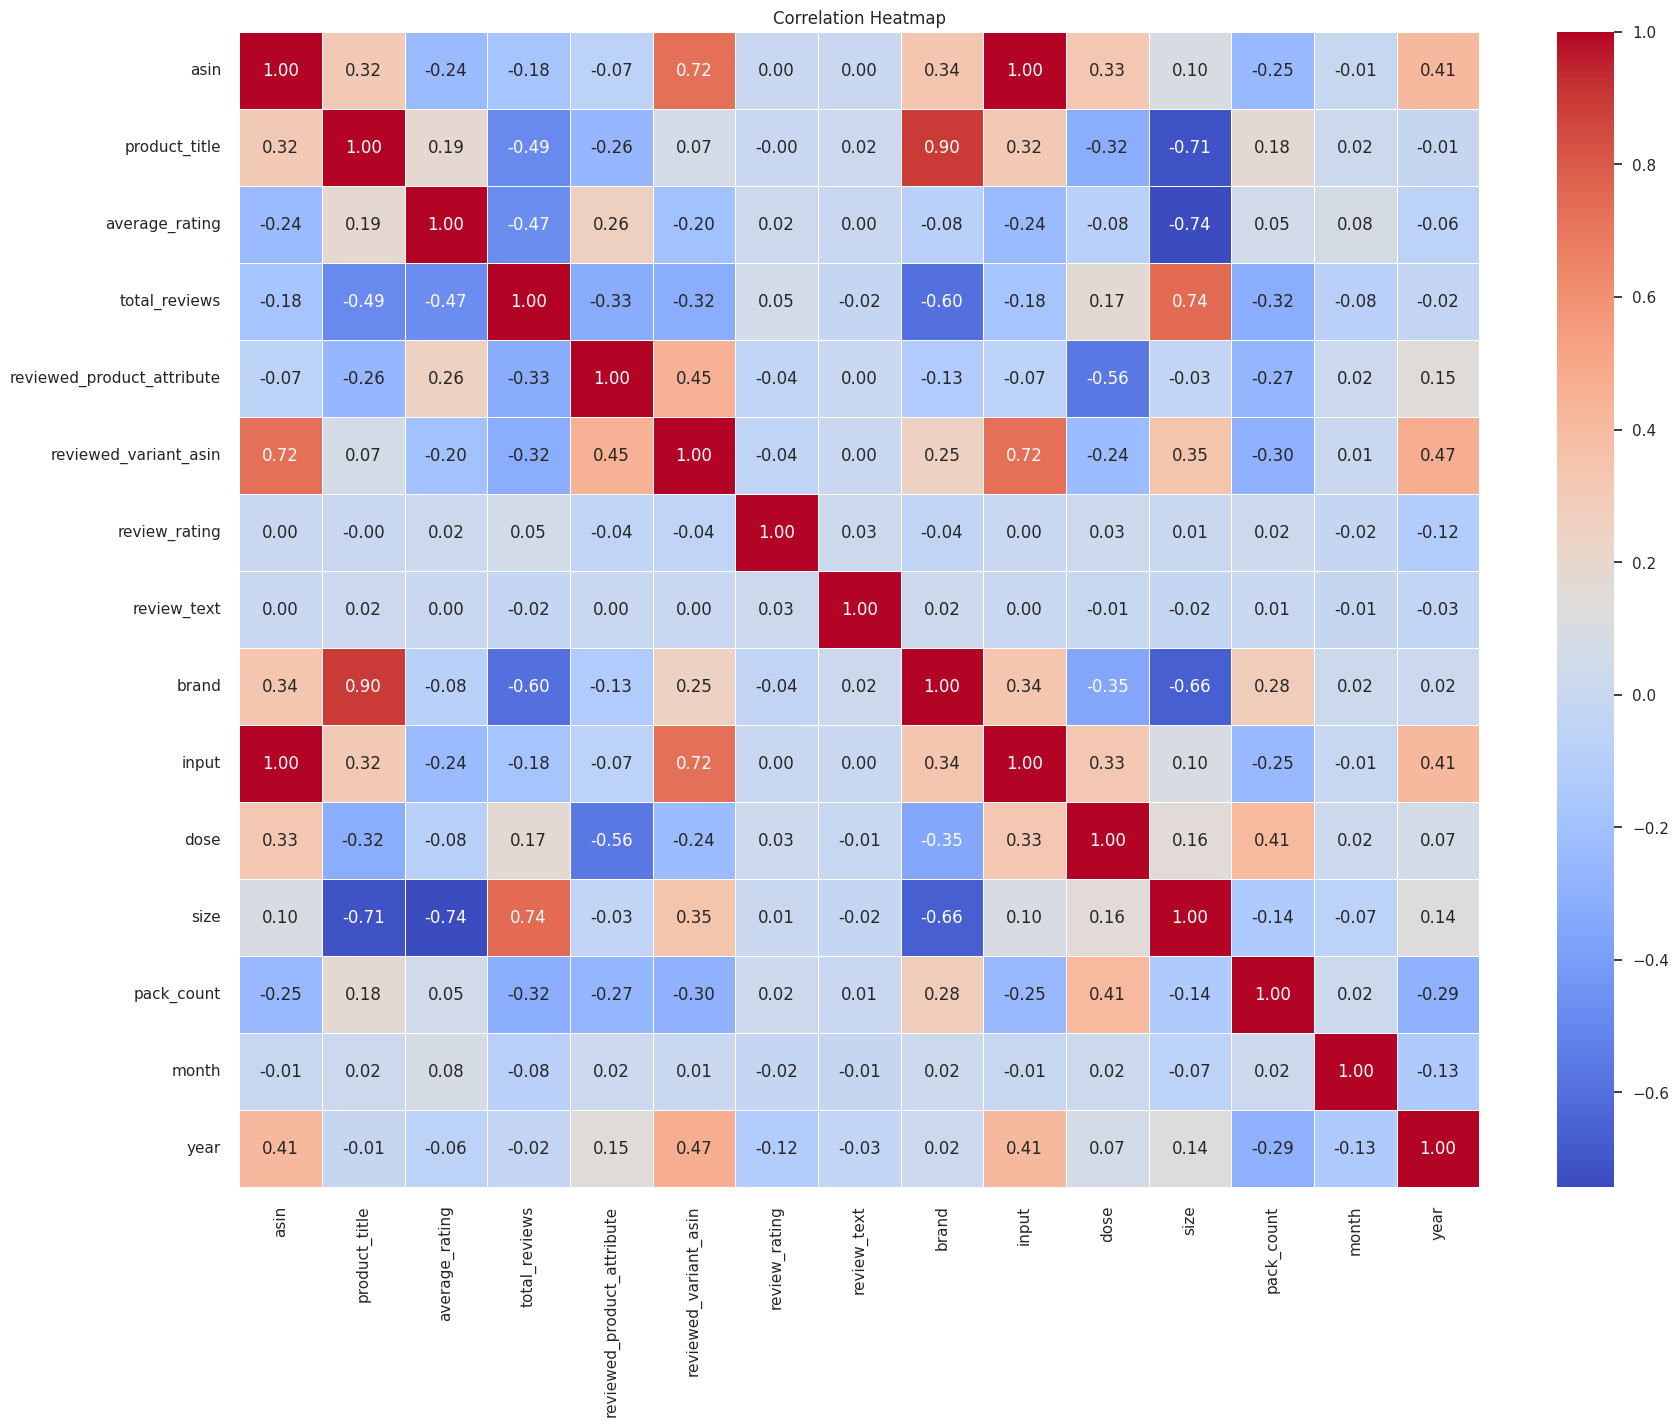

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = label_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


Feature Selection


In [116]:
label_df.dropna(inplace = True)

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import time

In [118]:
X = label_df.drop('dose',axis=1)
y=label_df['dose']

In [119]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
pd.DataFrame({'Column':X.columns,'Score':fit.scores_})

Column        Score
0                         asin  8864.059331
1                product_title     0.024529
2               average_rating  4583.215593
3                total_reviews  1363.680674
4   reviewed_product_attribute  2313.908092
5        reviewed_variant_asin  9393.104239
6                review_rating    34.246847
7                  review_text     0.530133
8                        brand  1806.654712
9                        input  8864.059331
10                        size   265.967119
11                  pack_count  2116.000351
12                       month     4.185369
13                        year   304.973507

Elapsed time to compute the importances: 4.179 seconds


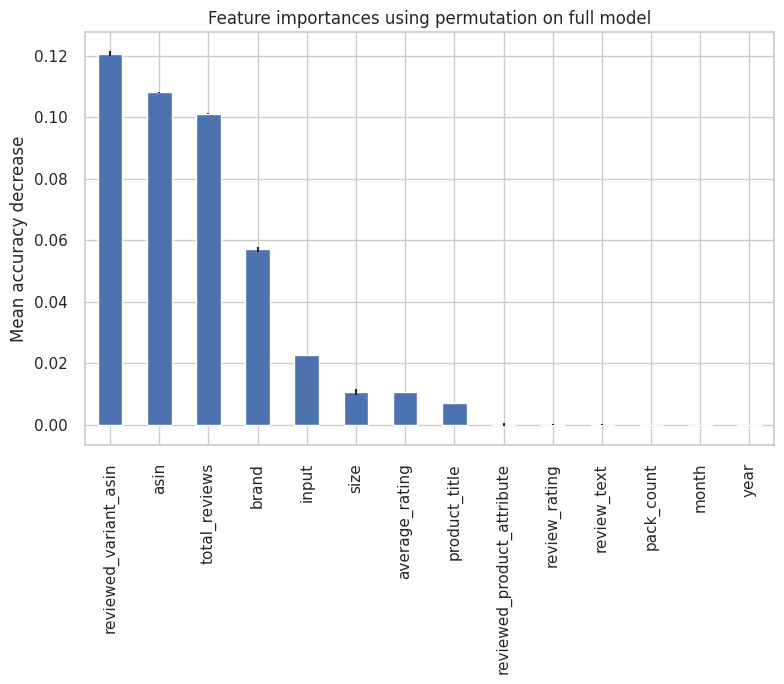

In [120]:
# Feature importance based on feature permutation
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.inspection import permutation_importance
start_time = time.time()
forest = rf()
forest.fit(X,y)
result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=42, n_jobs=1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [121]:
forest_importances

reviewed_variant_asin         0.120697
asin                          0.108078
total_reviews                 0.101112
brand                         0.057025
input                         0.022590
size                          0.010596
average_rating                0.010509
product_title                 0.006944
reviewed_product_attribute    0.000000
review_rating                 0.000000
review_text                   0.000000
pack_count                    0.000000
month                         0.000000
year                          0.000000
dtype: float64

In [122]:
X = label_df[['asin','reviewed_variant_asin','input','size','total_reviews','brand','average_rating']]


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined before this point
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()  # saga solver requires features to be scaled for model convergence

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Increase the number of iterations
logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Print accuracy
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f'Accuracy of logistic regression classifier on train set: {train_accuracy:.2f}')
print(f'Accuracy of logistic regression classifier on test set: {test_accuracy:.2f}')


Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 1.00
